In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Assignment!

In [4]:
# Set display options to show all columns without wrapping
pd.set_option('display.max_columns', None)  # This will display all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to the next line
# reading CSV file into field descrptor
fd_4g = pd.read_csv('Data/4G_Passive_measurements.csv')
print(fd_4g.head(10))

#fd_5g = pd.read_csv('Data/5G_Passive_measurements.csv')
#print(fd_5g.head(10))


   Unnamed: 0        Date          Time           UTC   Latitude  Longitude  Altitude  Speed  EARFCN  Frequency  PCI      MNC  CellIdentity  eNodeB.ID  Power   SINR   RSRP   RSRQ scenario  cellLongitude  cellLatitude  cellPosErrorLambda1  cellPosErrorLambda2  n_CellIdentities    distance  Band                 campaign
0      231098  14.01.2021  09:19:28.214  1.613291e+09  41.896722  12.507302     53.66   4.03    6300      806.0  412  "Op"[1]      76860425     300236 -54.38   6.70 -78.68 -19.41       OW      12.504280     41.890300            10.610001            10.610001                 6  757.483987    20  campaign_6_OW_4G_gaming
1      241306  14.01.2021  09:19:28.214  1.613291e+09  41.896722  12.507302     53.66   4.03    6300      806.0  411  "Op"[1]      76860427     300236 -52.63   5.18 -75.54 -16.26       OW      12.504280     41.890300            10.610001            10.610001                 6  757.483987    20  campaign_6_OW_4G_gaming
2      291097  14.01.2021  09:19:28.840 

In [5]:
print(list(fd_4g.columns))

['Unnamed: 0', 'Date', 'Time', 'UTC', 'Latitude', 'Longitude', 'Altitude', 'Speed', 'EARFCN', 'Frequency', 'PCI', 'MNC', 'CellIdentity', 'eNodeB.ID', 'Power', 'SINR', 'RSRP', 'RSRQ', 'scenario', 'cellLongitude', 'cellLatitude', 'cellPosErrorLambda1', 'cellPosErrorLambda2', 'n_CellIdentities', 'distance', 'Band', 'campaign']


In [6]:
grouped_by_operator = fd_4g.groupby('MNC')
signal_quality_columns = ['RSRP', 'RSRQ', 'SINR']
summary_stats = grouped_by_operator[signal_quality_columns].agg(['mean', 'median', 'std'])

# Display the summary statistics for each operator
print(summary_stats)


               RSRP                         RSRQ                       SINR                  
               mean median        std       mean median       std      mean median        std
MNC                                                                                          
"Op"[1] -100.161485 -98.98  15.604314 -20.280126 -19.29  5.536481  0.833658   2.23  11.473351
"Op"[2]  -98.142377 -99.16  12.642518 -20.498862 -19.74  5.272834  0.932823   3.17   9.833226


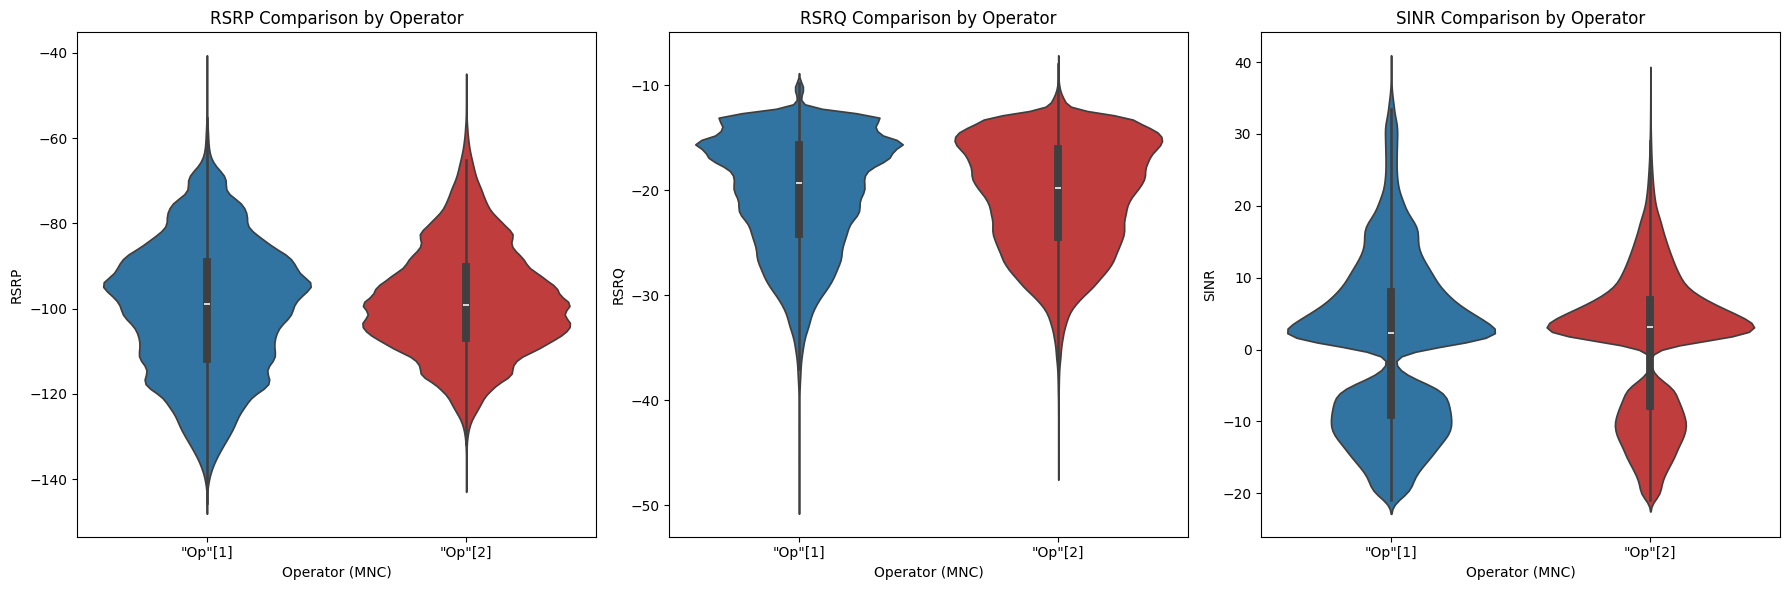

In [7]:
# Create a custom color palette (Blue for "Op"[1], Red for "Op"[2])
custom_palette = {"\"Op\"[1]": "#1f77b4", "\"Op\"[2]": "#d62728"}  # Blue for "Op"[1], Red for "Op"[2]

# Create subplots for RSRP, RSRQ, and SINR
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Violin plot for RSRP
sns.violinplot(x='MNC', y='RSRP', data=fd_4g, hue='MNC', palette=custom_palette, legend=False, ax=axes[0])
axes[0].set_title('RSRP Comparison by Operator')
axes[0].set_xlabel('Operator (MNC)')
axes[0].set_ylabel('RSRP')

# Violin plot for RSRQ
sns.violinplot(x='MNC', y='RSRQ', data=fd_4g, hue='MNC', palette=custom_palette, legend=False, ax=axes[1])
axes[1].set_title('RSRQ Comparison by Operator')
axes[1].set_xlabel('Operator (MNC)')
axes[1].set_ylabel('RSRQ')

# Violin plot for SINR
sns.violinplot(x='MNC', y='SINR', data=fd_4g, hue='MNC', palette=custom_palette, legend=False, ax=axes[2])
axes[2].set_title('SINR Comparison by Operator')
axes[2].set_xlabel('Operator (MNC)')
axes[2].set_ylabel('SINR')

# Adjust layout
plt.tight_layout()
plt.show()

## Summary of Violin Plots for Signal Metrics

### 1. **RSRP (Reference Signal Received Power) Comparison**
   - **RSRP** measures the power of the received signal (in dBm). Lower values indicate weaker signals (closer to -140 dBm), while higher values indicate stronger signals (closer to -60 dBm).
   - **Observations:**
     - Both operators show similar distributions, with most values ranging between -140 dBm and -60 dBm.
     - **Operator 1 ("Op"[1])** has slightly stronger signals on average compared to **Operator 2 ("Op"[2])**, as indicated by the thicker distribution around -100 dBm for Operator 1 and a thinner one for Operator 2.

### 2. **RSRQ (Reference Signal Received Quality) Comparison**
   - **RSRQ** measures the quality of the signal, considering factors like interference and noise (in dB). Lower values indicate poorer quality.
   - **Observations:**
     - **Operator 1 ("Op"[1])** shows better signal quality on average, with RSRQ values centered around -10 to -20 dB.
     - **Operator 2 ("Op"[2])** has a similar distribution but with slightly more data spread out towards lower quality values (between -20 and -40 dB).

### 3. **SINR (Signal to Interference and Noise Ratio) Comparison**
   - **SINR** measures the ratio of signal to interference and noise (in dB). Higher values indicate cleaner, stronger signals with less interference.
   - **Observations:**
     - **Operator 1 ("Op"[1])** shows a higher SINR range, typically between 0 and 30 dB, indicating better signal quality with less interference.
     - **Operator 2 ("Op"[2])** has lower SINR values, ranging from -10 to 20 dB, indicating more interference and lower signal quality on average.

---

### Key Takeaways
- **RSRP (Signal Strength):** Both operators have similar signal strength, but **Operator 1 ("Op"[1])** has a slightly stronger distribution.
- **RSRQ (Signal Quality):** **Operator 1** shows better signal quality compared to **Operator 2**, with values concentrated closer to 0 dB.
- **SINR (Signal to Interference and Noise Ratio):** **Operator 1** provides better overall signal quality with less interference, while **Operator 2** experiences more interference and lower SINR values.


# RSRP For Different Scenarios (OW,IS,OD) For Both Operators

C:\Users\elmir\AppData\Local\Temp\ipykernel_11732\956685114.py:24: FutureWarning: 

The `scale` parameter has been renamed to `width_method` and will be removed in v0.15. Pass `width_method='exponential' for the same effect.
  sns.boxenplot(
C:\Users\elmir\AppData\Local\Temp\ipykernel_11732\956685114.py:44: FutureWarning: 

The `scale` parameter has been renamed to `width_method` and will be removed in v0.15. Pass `width_method='exponential' for the same effect.
  sns.boxenplot(


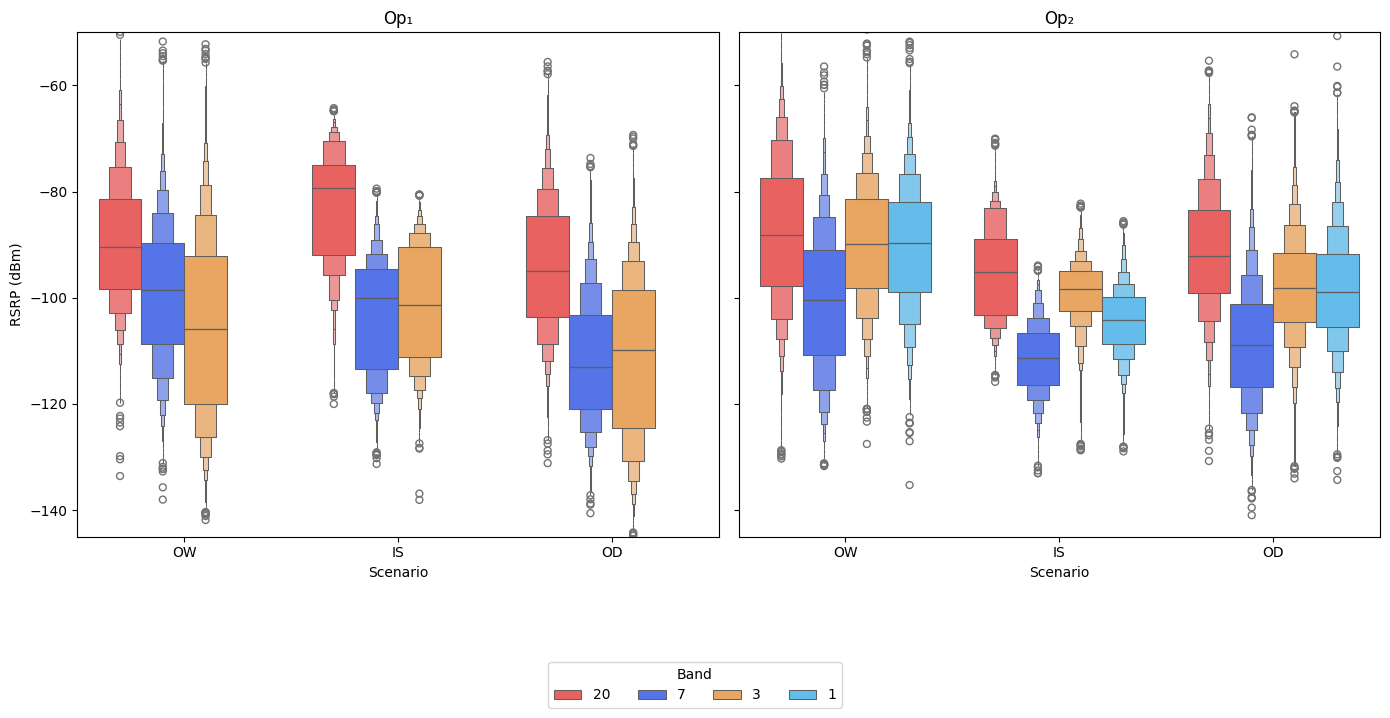

In [8]:
# Extract the numeric part of the MNC field by using string manipulation
fd_4g['MNC_numeric'] = fd_4g['MNC'].str.extract(r'\[(\d+)\]')  # Extract the number inside the brackets
fd_4g['MNC_numeric'] = pd.to_numeric(fd_4g['MNC_numeric'])  # Convert to numeric for easier filtering

# Filter data for each operator
op1_data = fd_4g[fd_4g['MNC_numeric'] == 1]  # Operator 1
op2_data = fd_4g[fd_4g['MNC_numeric'] == 2]  # Operator 2

hue_order = [20, 7, 3, 1]

# Set up the exact color palette, now including Band 1

palette = {
    20: '#ff4c4c',  # Very Bright Red for Band 20
    3: '#ffa64d',   # Vibrant Orange for Band 3
    1: '#4dc3ff',   # Bright Light Blue for Band 1
    7: '#3d66ff'    # Bold Dark Blue for Band 7
}

# Set up subplots: 1 row, 2 columns for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Operator 1 (Op1)
sns.boxenplot(
    x='scenario',
    y='RSRP',
    hue='Band',
    data=op1_data,
    dodge=True,
    palette=palette,  # Using the correct color palette
    hue_order=hue_order,
    k_depth='tukey',
    scale='exponential',
    ax=axes[0]
)
axes[0].set_title('Op₁')
axes[0].set_ylabel('RSRP (dBm)')
axes[0].set_xlabel('Scenario')

# Remove the legend from this plot
axes[0].get_legend().remove()

# Plot for Operator 2 (Op2) - Note that Band 1 should now appear here
sns.boxenplot(
    x='scenario',
    y='RSRP',
    hue='Band',
    data=op2_data,
    dodge=True,
    palette=palette,  # Using the correct color palette
    hue_order=hue_order,
    k_depth='tukey',
    scale='exponential',
    ax=axes[1]
)
axes[1].set_title('Op₂')
axes[1].set_ylabel('RSRP (dBm)')
axes[1].set_xlabel('Scenario')

# Remove the legend from this plot as well
axes[1].get_legend().remove()

# Add a single combined legend for both plots, and position it at the bottom
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title='Band', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)

# Set y-axis limits to match the scaling in your reference image
axes[0].set_ylim(-145, -50)  # Adjust to match the RSRP scale
axes[1].set_ylim(-145, -50)

plt.tight_layout()
plt.show()

# SINR For Different Scenarios (OW,IS,OD) For Both Operators

C:\Users\elmir\AppData\Local\Temp\ipykernel_11732\73690476.py:22: FutureWarning: 

The `scale` parameter has been renamed to `width_method` and will be removed in v0.15. Pass `width_method='exponential' for the same effect.
  sns.boxenplot(
C:\Users\elmir\AppData\Local\Temp\ipykernel_11732\73690476.py:42: FutureWarning: 

The `scale` parameter has been renamed to `width_method` and will be removed in v0.15. Pass `width_method='exponential' for the same effect.
  sns.boxenplot(


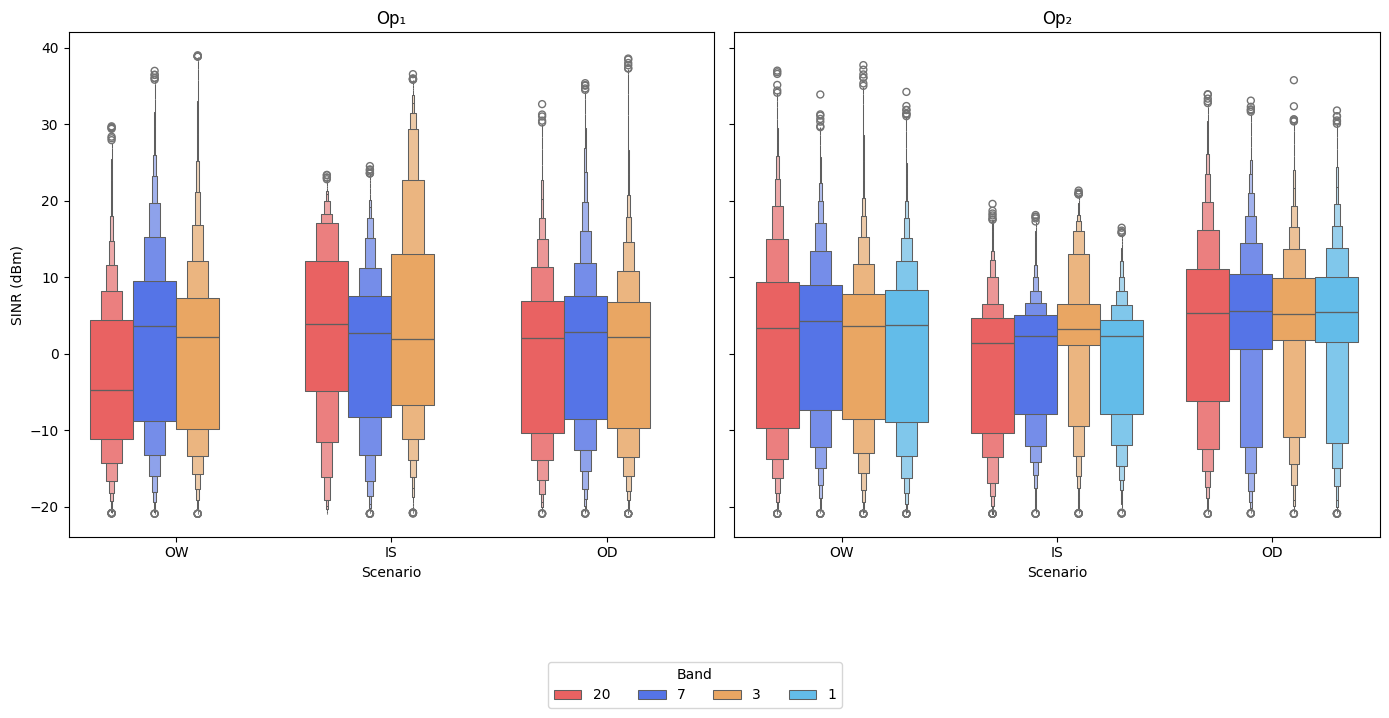

In [9]:
# Extract the numeric part of the MNC field by using string manipulation
fd_4g['MNC_numeric'] = fd_4g['MNC'].str.extract(r'\[(\d+)\]')  # Extract the number inside the brackets
fd_4g['MNC_numeric'] = pd.to_numeric(fd_4g['MNC_numeric'])  # Convert to numeric for easier filtering

# Filter data for each operator
op1_data = fd_4g[fd_4g['MNC_numeric'] == 1]  # Operator 1
op2_data = fd_4g[fd_4g['MNC_numeric'] == 2]  # Operator 2

hue_order = [20, 7, 3, 1]
# Set up the exact color palette, now including Band 1
palette = {
    20: '#ff4c4c',  # Very Bright Red for Band 20
    3: '#ffa64d',   # Vibrant Orange for Band 3
    1: '#4dc3ff',   # Bright Light Blue for Band 1
    7: '#3d66ff'    # Bold Dark Blue for Band 7
}

# Set up subplots: 1 row, 2 columns for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Operator 1 (Op1)
sns.boxenplot(
    x='scenario',
    y='SINR',
    hue='Band',
    data=op1_data,
    dodge=True,
    palette=palette,  # Using the correct color palette
    hue_order=hue_order,
    k_depth='tukey',
    scale='exponential',
    ax=axes[0]
)
axes[0].set_title('Op₁')
axes[0].set_ylabel('SINR (dBm)')
axes[0].set_xlabel('Scenario')

# Remove the legend from this plot
axes[0].get_legend().remove()

# Plot for Operator 2 (Op2) - Note that Band 1 should now appear here
sns.boxenplot(
    x='scenario',
    y='SINR',
    hue='Band',
    data=op2_data,
    dodge=True,
    palette=palette,  # Using the correct color palette
    hue_order=hue_order,
    k_depth='tukey',
    scale='exponential',
    ax=axes[1]
)
axes[1].set_title('Op₂')
axes[1].set_ylabel('SINR (dBm)')
axes[1].set_xlabel('Scenario')

# Remove the legend from this plot as well
axes[1].get_legend().remove()

# Add a single combined legend for both plots, and position it at the bottom
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title='Band', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)

# Set y-axis limits to match the scaling in your reference image

plt.tight_layout()
plt.show()

# RSRP (x-axis) and SINR (y-axis) for both operators, with color coding for different frequency bands. However, it looks like the data points are densely packed, making it a bit challenging to interpret at a glance

Patterning: You might notice that as RSRP (signal strength) improves (moving right on the x-axis), SINR (signal quality) also generally improves (moving up on the y-axis). However, there is variability, especially for lower signal strengths, which may suggest interference or congestion in some cases.

Cluster Density: The plot is extremely dense with overlapping points, which is why it’s difficult to extract patterns immediately.

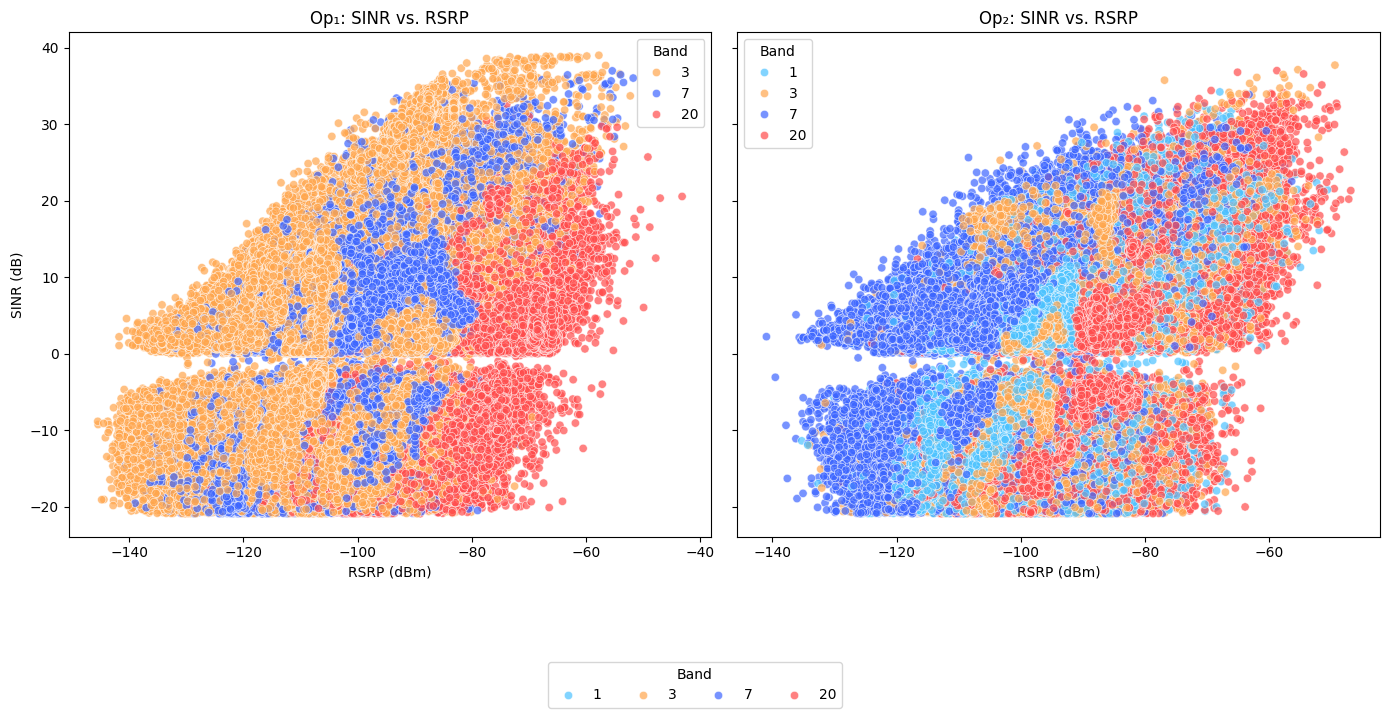

In [10]:
# Filter data for each operator
op1_data = fd_4g[fd_4g['MNC_numeric'] == 1]  # Operator 1
op2_data = fd_4g[fd_4g['MNC_numeric'] == 2]  # Operator 2

# Set up the color palette for the different bands
palette = {
    20: '#ff4c4c',  # Very Bright Red for Band 20
    3: '#ffa64d',   # Vibrant Orange for Band 3
    1: '#4dc3ff',   # Bright Light Blue for Band 1
    7: '#3d66ff'    # Bold Dark Blue for Band 7
}

# Set up subplots: 1 row, 2 columns for side-by-side scatter plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Scatter plot for Operator 1
sns.scatterplot(
    x='RSRP',
    y='SINR',
    hue='Band',
    data=op1_data,
    palette=palette,
    ax=axes[0],
    alpha=0.7  # Add some transparency for better visibility
)
axes[0].set_title('Op₁: SINR vs. RSRP')
axes[0].set_xlabel('RSRP (dBm)')
axes[0].set_ylabel('SINR (dB)')

# Scatter plot for Operator 2
sns.scatterplot(
    x='RSRP',
    y='SINR',
    hue='Band',
    data=op2_data,
    palette=palette,
    ax=axes[1],
    alpha=0.7  # Add some transparency for better visibility
)
axes[1].set_title('Op₂: SINR vs. RSRP')
axes[1].set_xlabel('RSRP (dBm)')
axes[1].set_ylabel('SINR (dB)')

# Adjust the layout
plt.tight_layout()

# Add a single combined legend for both plots, and position it at the bottom
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title='Band', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)

plt.show()

This aggregates data into hexagonal bins, showing the density of points in each region. This way, you can more easily identify trends or clusters of data without overwhelming the plot.

This hexbin plot shows a much clearer view of the distribution of data points between SINR and RSRP for both operators compared to the scatter plot. Here's how you might interpret this plot and some potential insights:

x-axis (RSRP in dBm): This shows the signal strength received by the User Equipment (UE) from the cell tower. Higher values (closer to 0 dBm) mean stronger signals, while more negative values (closer to -140 dBm) indicate weaker signals.

y-axis (SINR in dB): This shows the Signal-to-Interference-plus-Noise Ratio (SINR), which is a measure of signal quality. Higher values indicate better quality (less interference), and lower or negative values indicate poor signal quality.

Color (Counts): The color intensity shows the number of data points that fall into each bin. Darker colors represent areas where more data points are concentrated, indicating common signal strength and quality combinations.

Interpretation of the Plots:
Op₁ vs. Op₂ Comparison:

Op₁ (left) generally shows a wider distribution of data points, especially in the Band 3 and Band 7 plots. This could suggest that Op₁ is operating across a broader range of conditions, including both strong and weak signal areas.
Op₂ (right) has denser clusters around certain values of RSRP and SINR, which could indicate more consistent performance in certain bands (e.g., Band 20), but also more limitations in others (e.g., Band 3).
Band Performance:

Band 20: For both operators, Band 20 shows a consistent range of RSRP around -100 to -80 dBm, with SINR mostly in the positive range (0-20 dB). This band likely provides stable and reliable service, with better signal quality and lower interference.
Band 3: There seems to be a significant number of data points concentrated in the weak signal region (RSRP -120 to -100 dBm), particularly for Op₁. This band might struggle more in certain areas, possibly indicating lower coverage or more interference.
Band 7: For Op₁, Band 7 appears to have a wider distribution of SINR, indicating more variability in signal quality, despite a stronger signal range (RSRP -100 to -80 dBm). Op₂ seems to have a tighter, more consistent performance in this band.
Signal Strength and Quality Correlation:

Generally, you can observe that as RSRP improves (moves right on the x-axis), SINR also improves (moves up on the y-axis), indicating that better signal strength often results in better signal quality. This is most evident in Bands 20 and 7 for both operators.
However, in Band 3, particularly for Op₁, there are data points where SINR is low (or negative) even with moderate signal strength, suggesting interference or noise issues in certain areas.
Performance Clusters:

The darker color clusters (e.g., in Band 20) show where the majority of users experience typical signal conditions. For instance, many users for both operators have RSRP around -100 dBm and SINR around 10-20 dB in Band 20, which represents decent signal strength and quality.
Key Insights:
Operator Performance:

Op₁ seems to have a broader range of signal conditions, especially in Bands 3 and 7, while Op₂ is more concentrated, particularly in Band 20. This could suggest that Op₂ may be more optimized for certain frequency bands, while Op₁ operates more flexibly across a wider range.
Band-Specific Observations:

Band 20 performs best for both operators, as most data points fall in the range of better signal strength and quality. Band 3 seems to struggle with poorer signal quality, especially for Op₁, which might indicate weaker infrastructure or more interference in that band.
Correlation Between RSRP and SINR:

The positive correlation between RSRP and SINR indicates that improving signal strength generally improves quality, though interference or other environmental factors can still impact SINR even when RSRP is good, as seen in some bands.

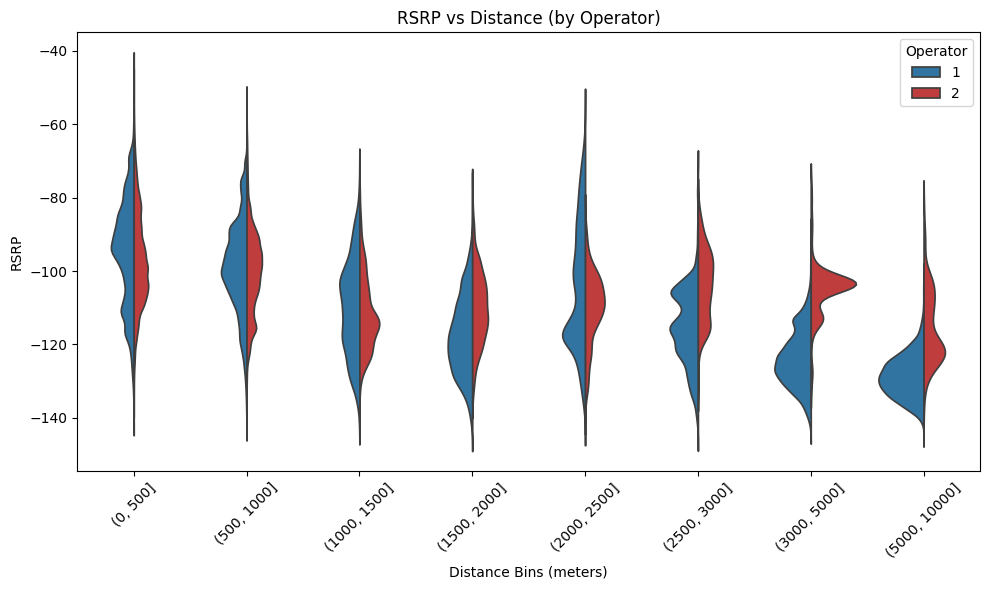

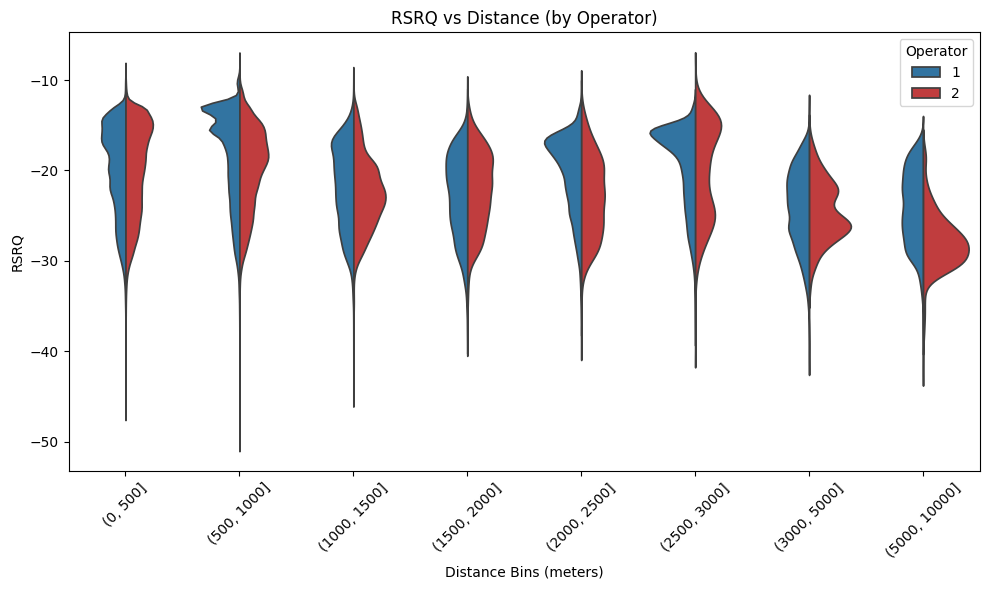

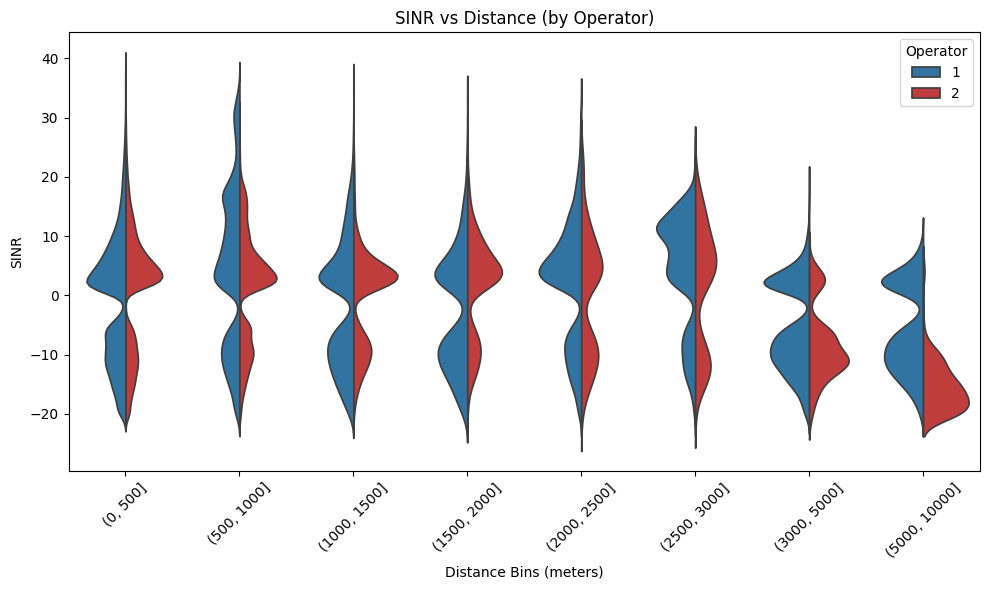

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


columns_of_interest = ['SINR', 'RSRP', 'RSRQ', 'distance', 'Band', 'MNC_numeric']  # Adjust according to your dataset
filtered_data = fd_4g[columns_of_interest].dropna()

# Create distance bins
distance_bins = pd.cut(filtered_data['distance'], bins=[0, 500, 1000, 1500, 2000, 2500, 3000, 5000, 10000])

# Add the distance bins to the dataset
filtered_data['distance_bin'] = distance_bins
# Custom palette for operators using integers
custom_palette = {1: "#1f77b4", 2: "#d62728"}  # Blue for Op₁, Red for Op₂

# Function to create violin plots with cleaner visuals
def plot_violin(metric):
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='distance_bin', y=metric, hue='MNC_numeric', data=filtered_data, palette=custom_palette, split=True, inner=None)  # Removed the black box plot inside
    plt.title(f'{metric} vs Distance (by Operator)')
    plt.xlabel('Distance Bins (meters)')
    plt.ylabel(metric)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title='Operator')
    plt.tight_layout()
    plt.show()

# Plot for RSRP
plot_violin('RSRP')

# Plot for RSRQ
plot_violin('RSRQ')

# Plot for SINR
plot_violin('SINR')


MNC_numeric           1       2
distance_bucket                
0-500            117442  211883
1000-3000         37631    7465
3000-5000         10327     659
500-1000          67684   52735


C:\Users\elmir\AppData\Local\Temp\ipykernel_11732\2066296013.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = filtered_data.groupby(['distance_bucket', 'op_scenario'])['RSRQ'].mean().unstack()


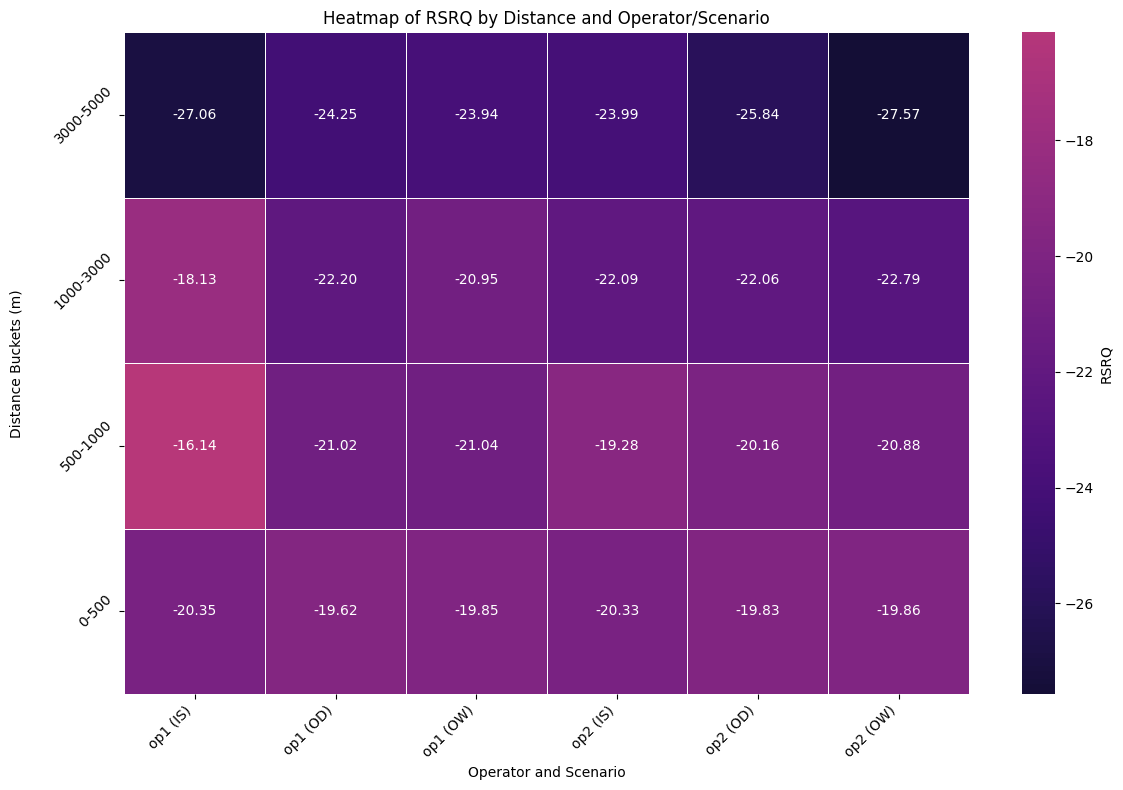

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Step 1: Select the columns of interest
columns_of_interest = ['SINR', 'RSRP', 'RSRQ', 'distance', 'Band', 'Frequency', 'MNC_numeric', 'scenario', 'campaign']
filtered_data = fd_4g[columns_of_interest].dropna()

# Step 2: Define a function to create distance buckets
    
def categorize_distance(distance):
    if distance <= 500:
        return '0-500'
    elif distance <= 1000:
        return '500-1000'
    elif distance <= 3000:
        return '1000-3000'
    else:
        return '3000-5000'
    

# Step 3: Apply the distance categorization to the filtered data
filtered_data['distance_bucket'] = filtered_data['distance'].apply(categorize_distance)

# Group by both 'distance_bucket' and 'MNC_numeric' (operator), and count the number of data points
bucket_operator_counts = filtered_data.groupby(['distance_bucket', 'MNC_numeric']).size().unstack()

# Display the result
print(bucket_operator_counts)


# Step 4: Order the distance buckets correctly using pd.Categorical
distance_order = ['0-500', '500-1000', '1000-3000', '3000-5000']

filtered_data['distance_bucket'] = pd.Categorical(filtered_data['distance_bucket'], categories=distance_order, ordered=True)

# Step 5: Create a new column that combines operator (MNC_numeric) and scenario, and append 'op' to the operator
filtered_data['op_scenario'] = 'op' + filtered_data['MNC_numeric'].astype(str) + ' (' + filtered_data['scenario'] + ')'

# Step 6: Group the data by distance_bucket and op_scenario, and calculate the mean RSRQ
heatmap_data = filtered_data.groupby(['distance_bucket', 'op_scenario'])['RSRQ'].mean().unstack()

# Step 7: Create a custom colormap from the middle part of 'magma'
magma_middle = LinearSegmentedColormap.from_list('inferno_middle', plt.cm.magma(np.linspace(0.1, 0.5, 256)))  # Using a section of the colormap

# Step 8: Plot the heatmap with the custom colormap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap=magma_middle, annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'RSRQ'}, yticklabels=True )
# Step 9: Customize the plot
plt.title('Heatmap of RSRQ by Distance and Operator/Scenario')
plt.ylabel('Distance Buckets (m)', labelpad=20)
plt.xlabel('Operator and Scenario')

# Rotate X and Y axis labels
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45)

# Flip the Y-axis so smaller distances are on top
plt.gca().invert_yaxis()

# Show the heatmap
plt.tight_layout()
plt.show()


C:\Users\elmir\AppData\Local\Temp\ipykernel_11732\439420835.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = operator_data.groupby(['distance_bucket', 'scenario'])['RSRQ'].mean().unstack()


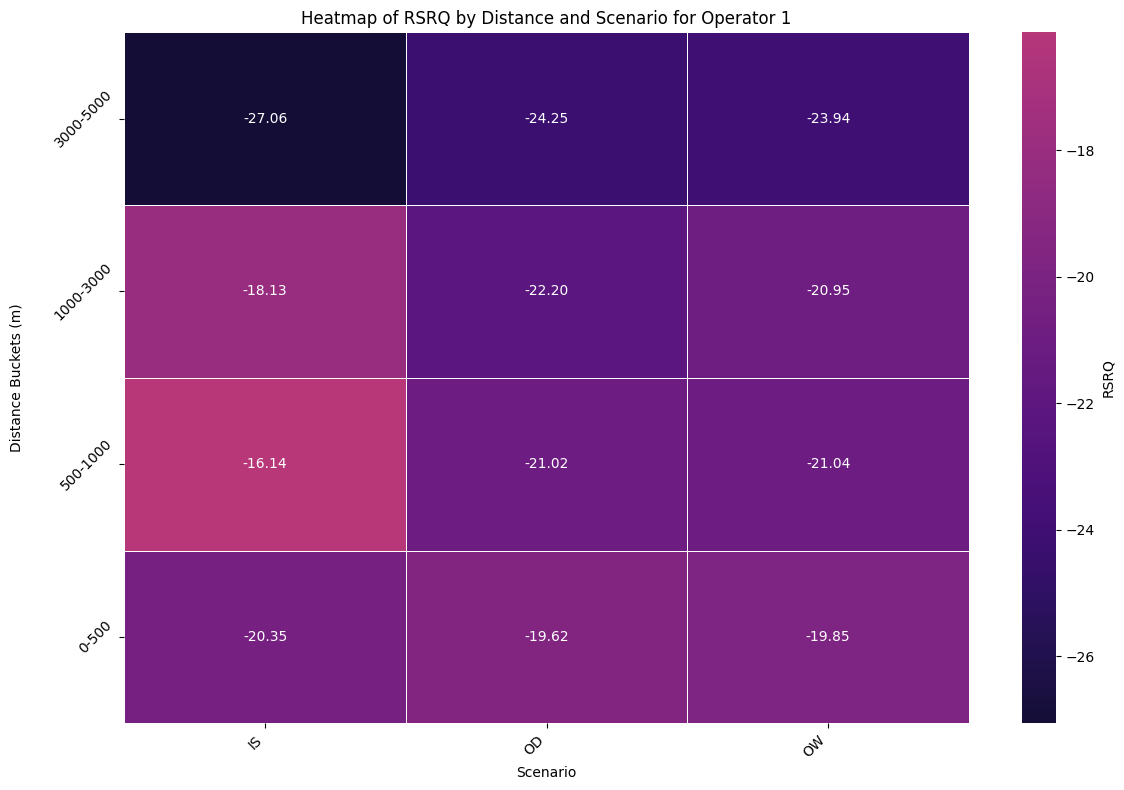

C:\Users\elmir\AppData\Local\Temp\ipykernel_11732\439420835.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = operator_data.groupby(['distance_bucket', 'scenario'])['RSRQ'].mean().unstack()


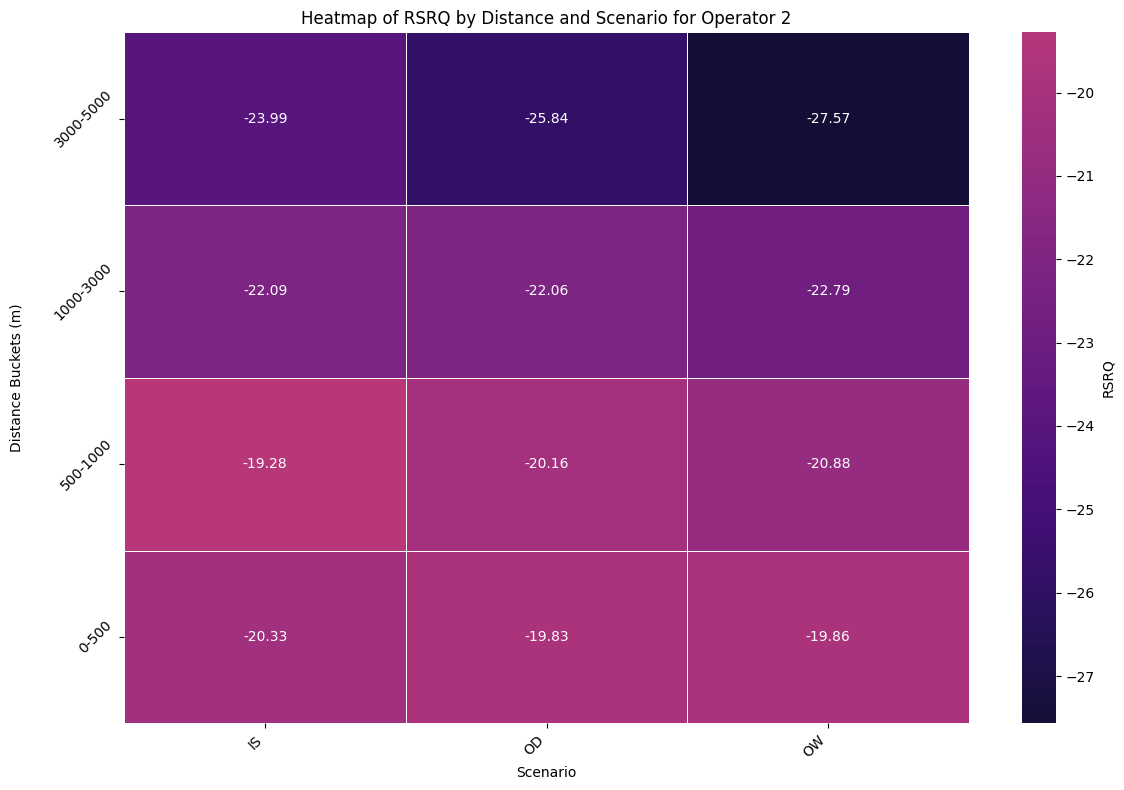

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Step 1: Select the columns of interest
columns_of_interest = ['SINR', 'RSRP', 'RSRQ', 'distance', 'Band', 'Frequency', 'MNC_numeric', 'scenario', 'campaign']
filtered_data = fd_4g[columns_of_interest].dropna()

# Step 2: Define a function to create distance buckets
def categorize_distance(distance):
    if distance <= 500:
        return '0-500'
    elif distance <= 1000:
        return '500-1000'
    elif distance <= 3000:
        return '1000-3000'
    else:
        return '3000-5000'

# Apply the distance categorization to the filtered data
filtered_data['distance_bucket'] = filtered_data['distance'].apply(categorize_distance)

# Order the distance buckets correctly using pd.Categorical
distance_order = ['0-500', '500-1000', '1000-3000', '3000-5000']
filtered_data['distance_bucket'] = pd.Categorical(filtered_data['distance_bucket'], categories=distance_order, ordered=True)

# Step 3: Create a new column that combines operator (MNC_numeric) and scenario, and append 'op' to the operator
filtered_data['op_scenario'] = 'op' + filtered_data['MNC_numeric'].astype(str) + ' (' + filtered_data['scenario'] + ')'

# Step 4: Filter data for each operator and create separate heatmaps
for operator in filtered_data['MNC_numeric'].unique():
    # Filter the data for the current operator
    operator_data = filtered_data[filtered_data['MNC_numeric'] == operator]
    
    # Group the data by distance_bucket and scenario, and calculate the mean RSRQ
    heatmap_data = operator_data.groupby(['distance_bucket', 'scenario'])['RSRQ'].mean().unstack()

    # Create a custom colormap from the middle part of 'magma'
    magma_middle = LinearSegmentedColormap.from_list('magma_middle', plt.cm.magma(np.linspace(0.1, 0.5, 256)))  # Using a section of the colormap
    
    # Plot the heatmap with the custom colormap for the current operator
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, cmap=magma_middle, annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'RSRQ'}, yticklabels=True)
    
    # Customize the plot
    plt.title(f'Heatmap of RSRQ by Distance and Scenario for Operator {operator}')
    plt.ylabel('Distance Buckets (m)', labelpad=20)
    plt.xlabel('Scenario')

    # Rotate X and Y axis labels
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=45)

    # Flip the Y-axis so smaller distances are on top
    plt.gca().invert_yaxis()

    # Show the heatmap
    plt.tight_layout()
    plt.show()

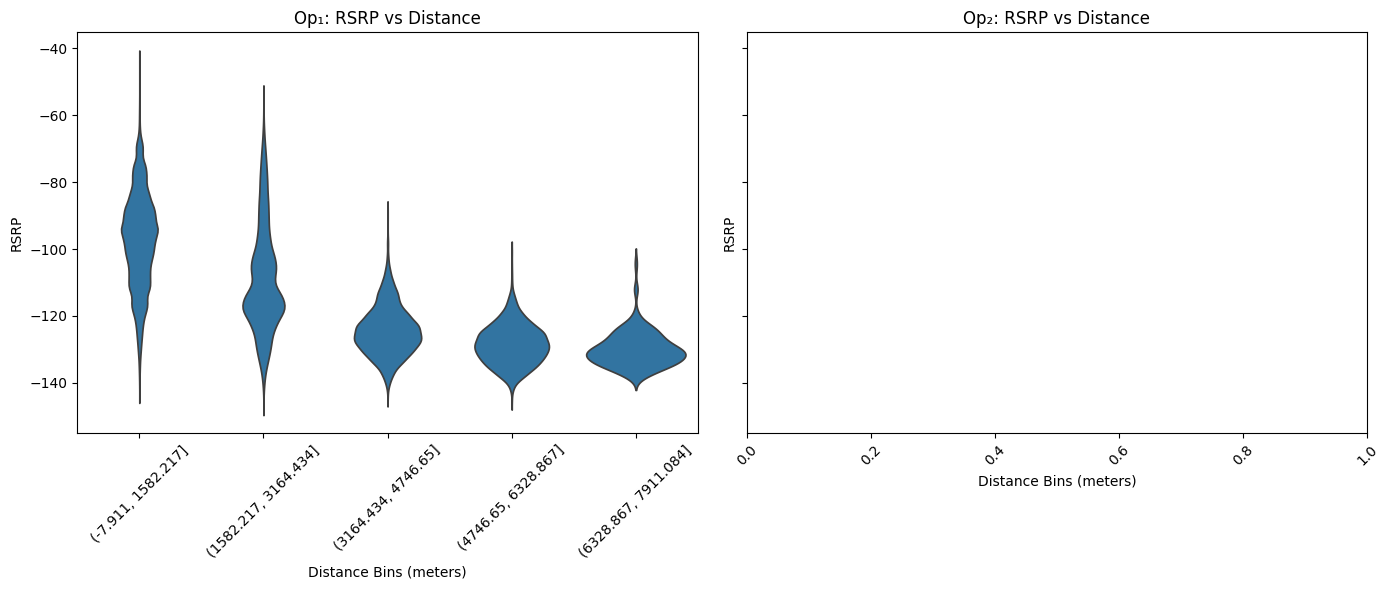

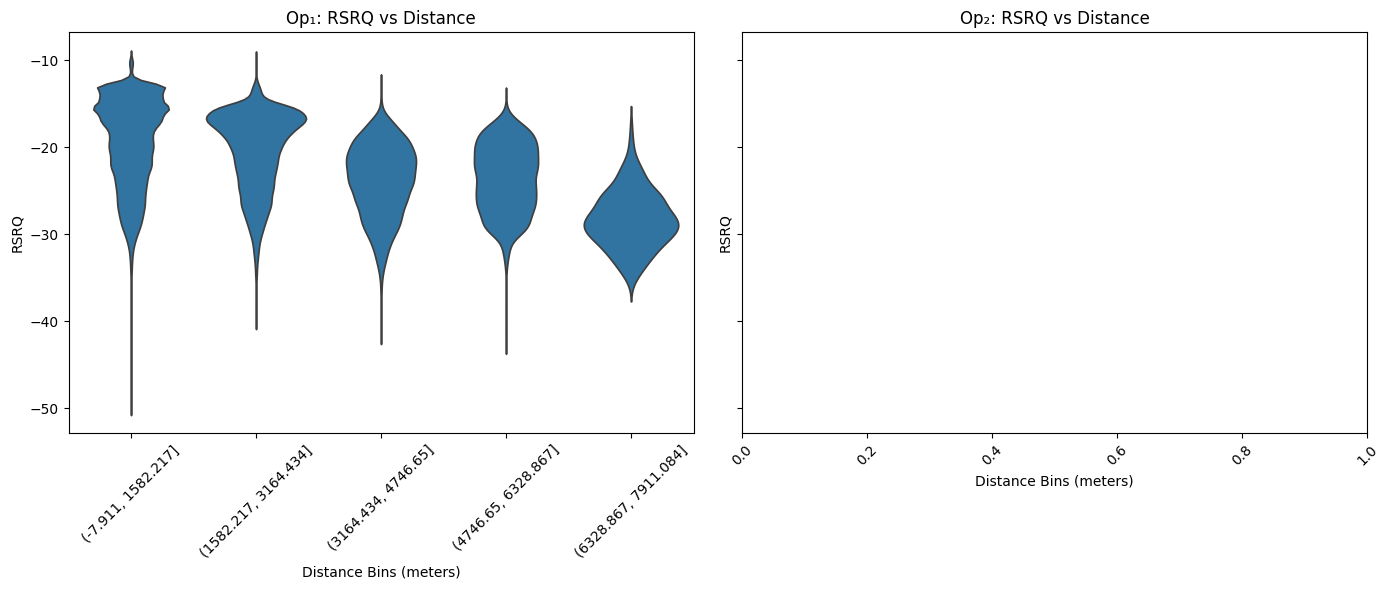

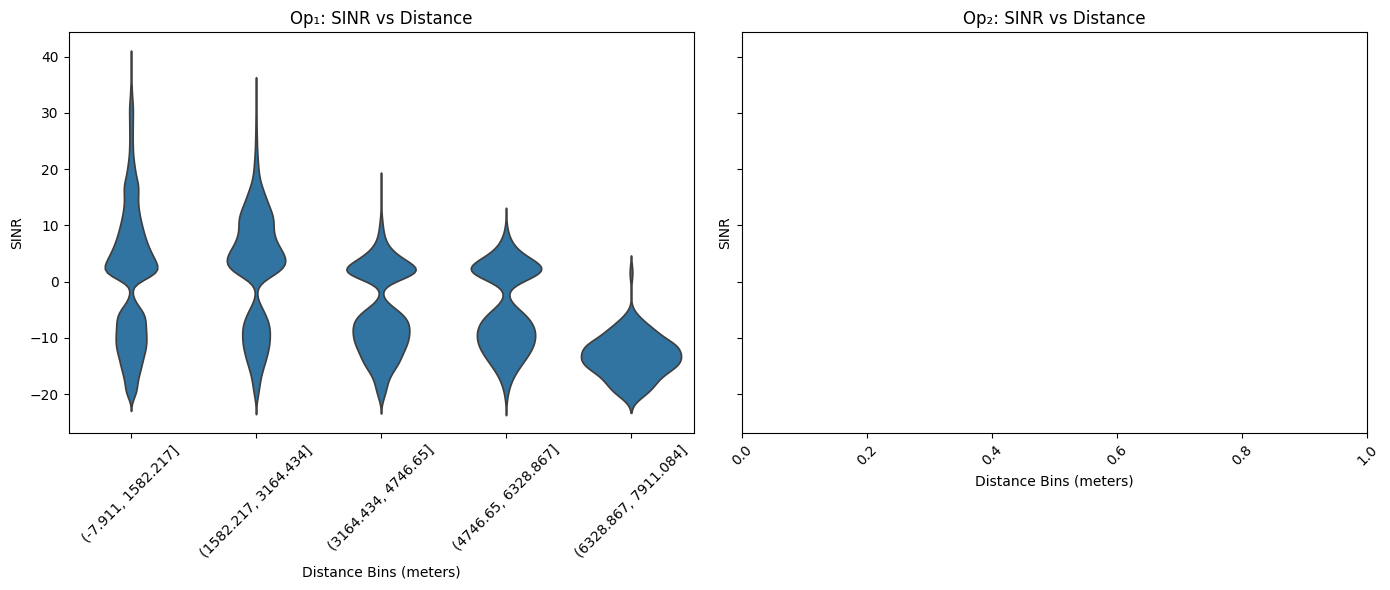

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create violin plots for each operator in separate subplots
def plot_violin_split(metric):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Operator 1 plot
    sns.violinplot(x='distance_bin', y=metric, data=filtered_data[filtered_data['MNC_numeric'] == 1], 
                   color="#1f77b4", ax=axes[0], inner=None)
    axes[0].set_title(f'Op₁: {metric} vs Distance')
    axes[0].set_xlabel('Distance Bins (meters)')
    axes[0].set_ylabel(metric)
    axes[0].tick_params(axis='x', rotation=45)  # Correct rotation without set_xticklabels

    # Operator 2 plot
    sns.violinplot(x='distance_bin', y=metric, data=filtered_data[filtered_data['MNC_numeric'] == 2], 
                   color="#d62728", ax=axes[1], inner=None)
    axes[1].set_title(f'Op₂: {metric} vs Distance')
    axes[1].set_xlabel('Distance Bins (meters)')
    axes[1].set_ylabel(metric)
    axes[1].tick_params(axis='x', rotation=45)  # Correct rotation without set_xticklabels

    plt.tight_layout()
    plt.show()

# Plot for RSRP
plot_violin_split('RSRP')

# Plot for RSRQ
plot_violin_split('RSRQ')

# Plot for SINR
plot_violin_split('SINR')


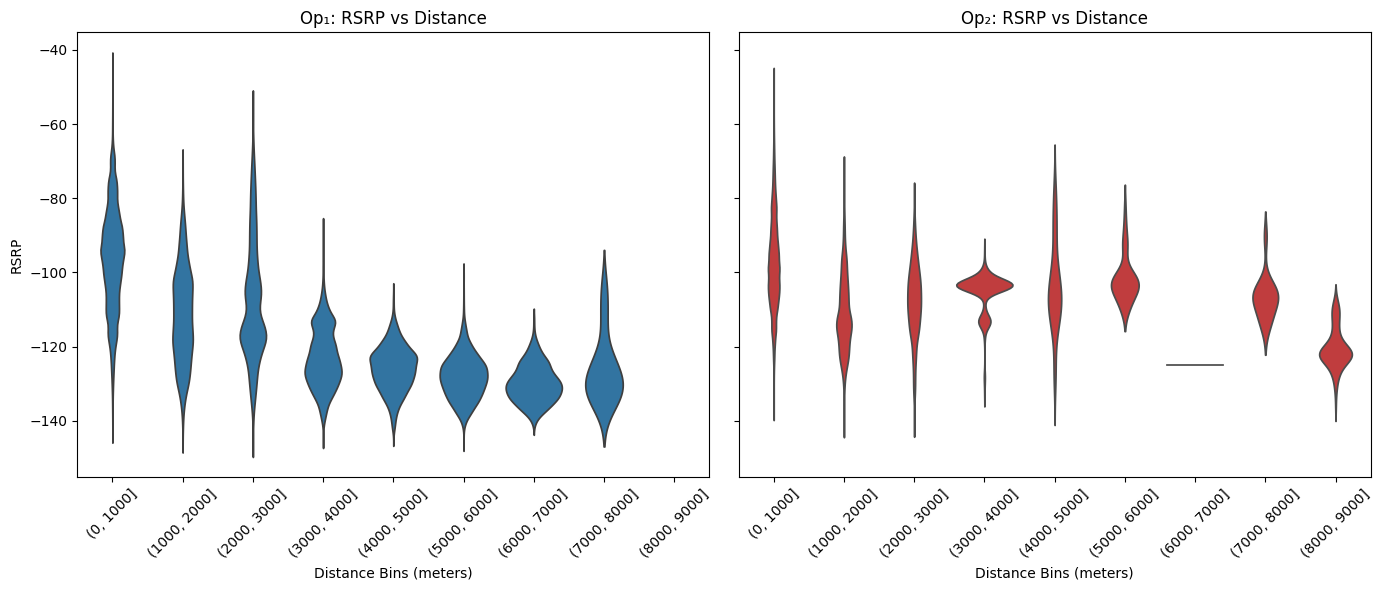

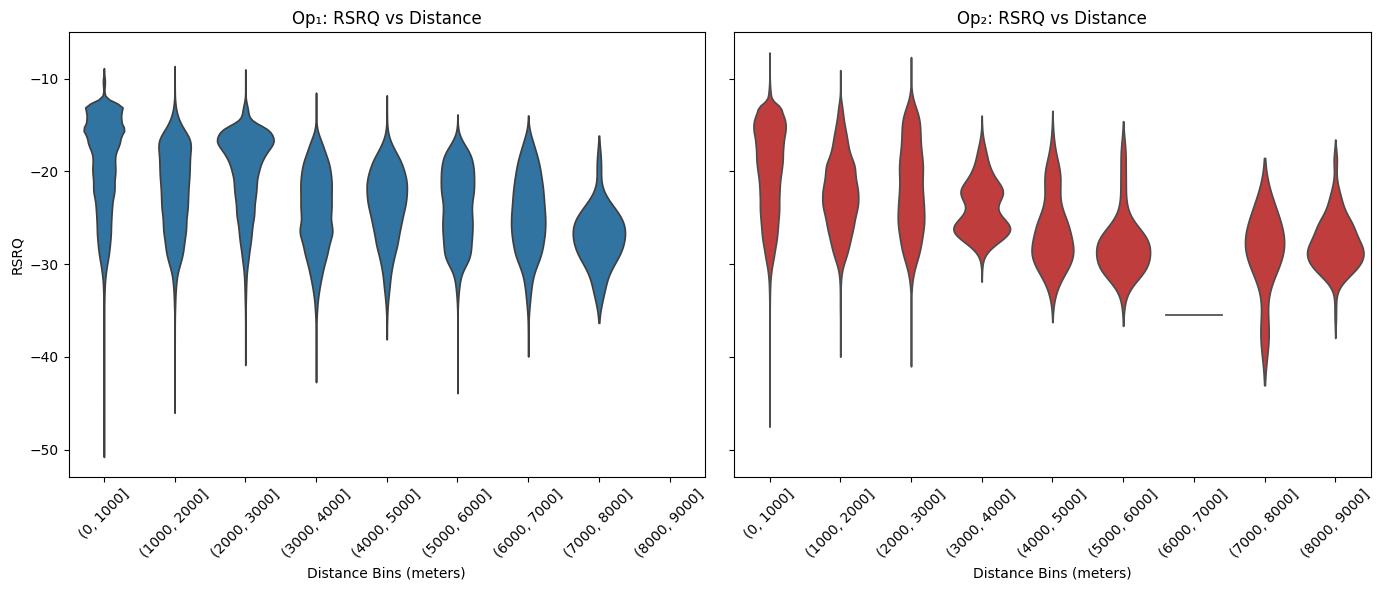

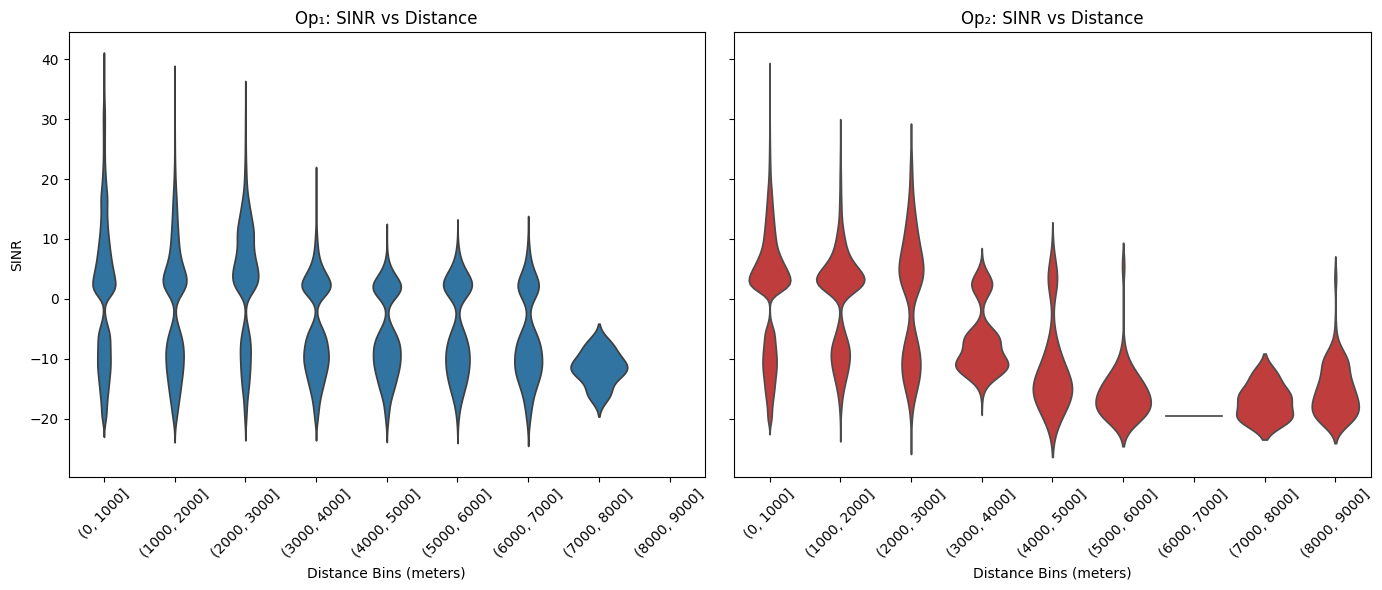

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example of fixed-width bins (you can adjust the bins as needed)
distance_bins = pd.cut(filtered_data['distance'], bins=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000])

# Or, use quantile-based bins for a more balanced distribution
# distance_bins = pd.qcut(filtered_data['distance'], q=8)

# Add the distance bins to the dataset
filtered_data['distance_bin'] = distance_bins

# Function to create violin plots for each operator in separate subplots
def plot_violin_split(metric):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Operator 1 plot
    sns.violinplot(x='distance_bin', y=metric, data=filtered_data[filtered_data['MNC_numeric'] == 1], 
                   color="#1f77b4", ax=axes[0], inner=None)
    axes[0].set_title(f'Op₁: {metric} vs Distance')
    axes[0].set_xlabel('Distance Bins (meters)')
    axes[0].set_ylabel(metric)
    axes[0].tick_params(axis='x', rotation=45)

    # Operator 2 plot
    sns.violinplot(x='distance_bin', y=metric, data=filtered_data[filtered_data['MNC_numeric'] == 2], 
                   color="#d62728", ax=axes[1], inner=None)
    axes[1].set_title(f'Op₂: {metric} vs Distance')
    axes[1].set_xlabel('Distance Bins (meters)')
    axes[1].set_ylabel(metric)
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Plot for RSRP
plot_violin_split('RSRP')

# Plot for RSRQ
plot_violin_split('RSRQ')

# Plot for SINR
plot_violin_split('SINR')


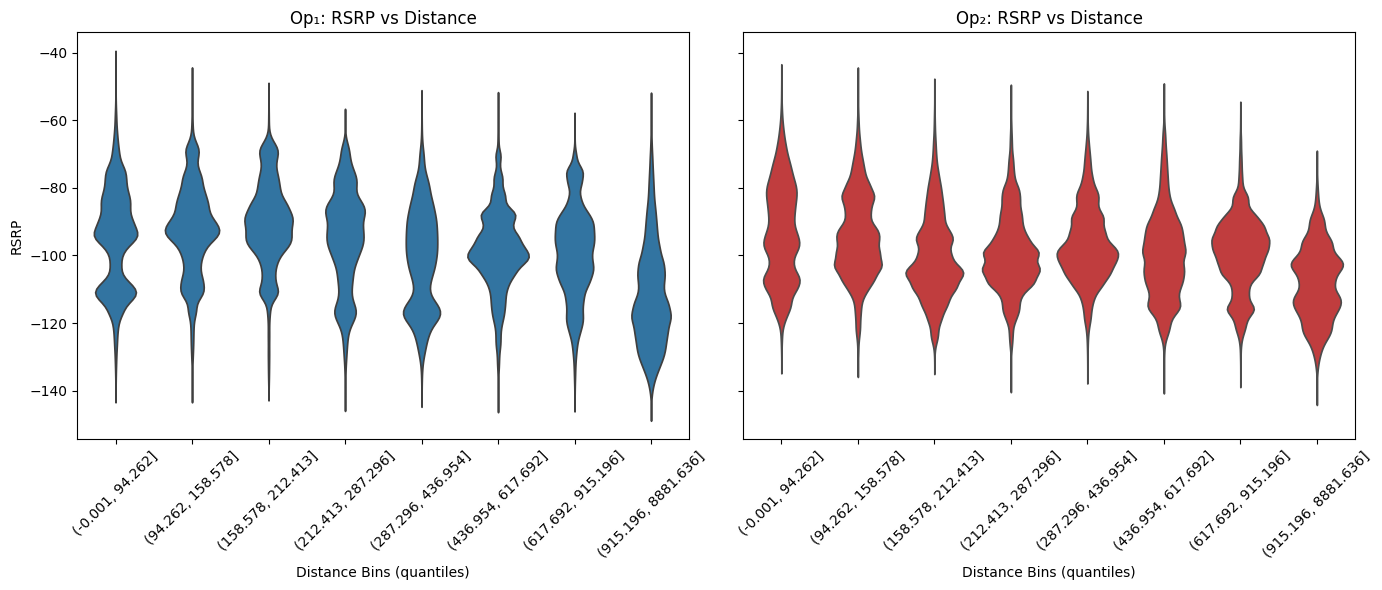

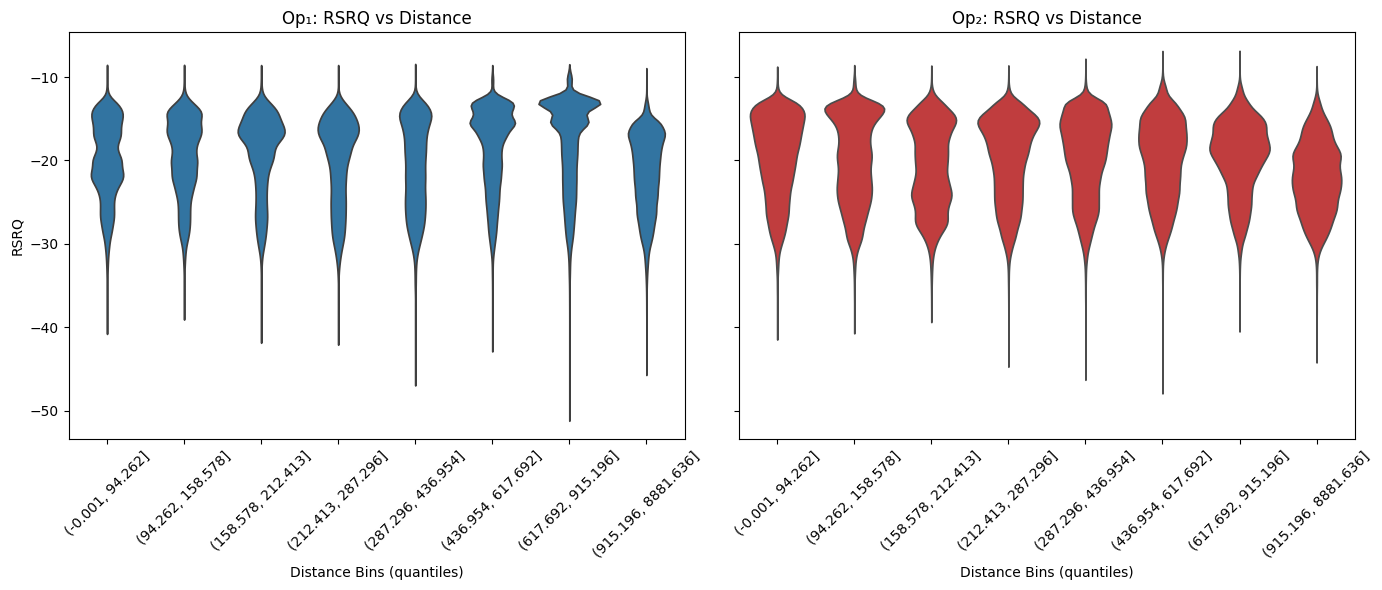

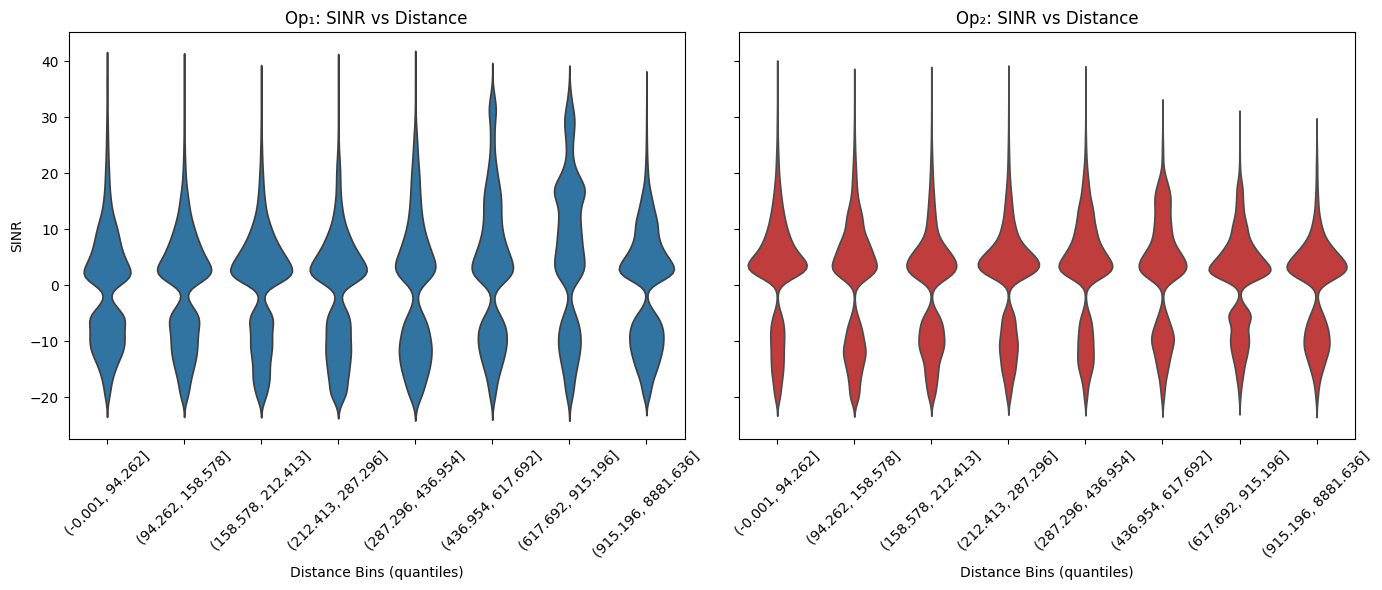

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create quantile-based distance bins with equal number of observations in each bin
distance_bins = pd.qcut(filtered_data['distance'], q=8)  # Here, q=8 creates 8 bins
filtered_data['distance_bin'] = distance_bins

# Function to create violin plots for each operator in separate subplots
def plot_violin_split(metric):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Operator 1 plot
    sns.violinplot(x='distance_bin', y=metric, data=filtered_data[filtered_data['MNC_numeric'] == 1], 
                   color="#1f77b4", ax=axes[0], inner=None)
    axes[0].set_title(f'Op₁: {metric} vs Distance')
    axes[0].set_xlabel('Distance Bins (quantiles)')
    axes[0].set_ylabel(metric)
    axes[0].tick_params(axis='x', rotation=45)

    # Operator 2 plot
    sns.violinplot(x='distance_bin', y=metric, data=filtered_data[filtered_data['MNC_numeric'] == 2], 
                   color="#d62728", ax=axes[1], inner=None)
    axes[1].set_title(f'Op₂: {metric} vs Distance')
    axes[1].set_xlabel('Distance Bins (quantiles)')
    axes[1].set_ylabel(metric)
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Plot for RSRP
plot_violin_split('RSRP')

# Plot for RSRQ
plot_violin_split('RSRQ')

# Plot for SINR
plot_violin_split('SINR')


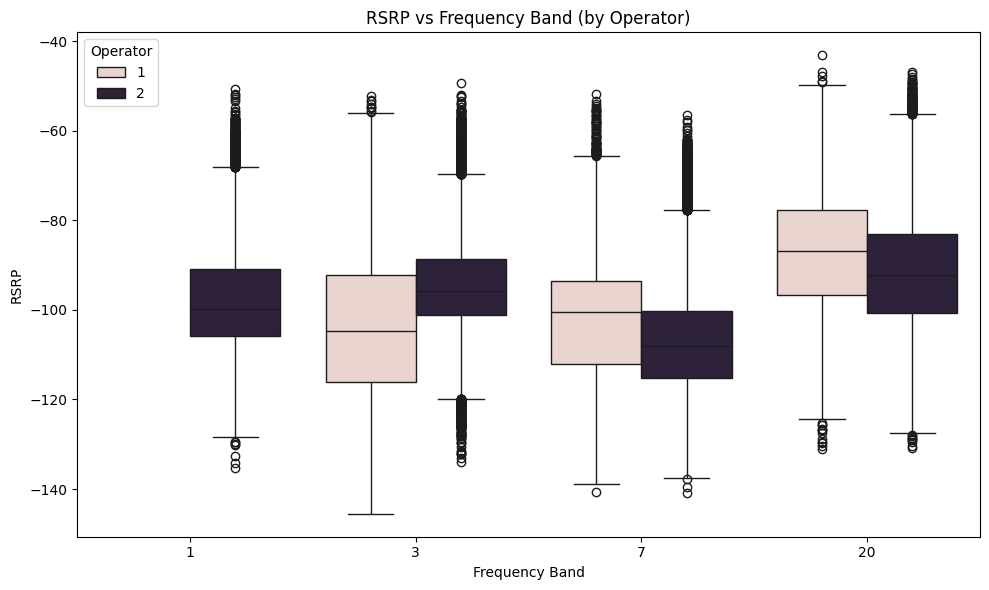

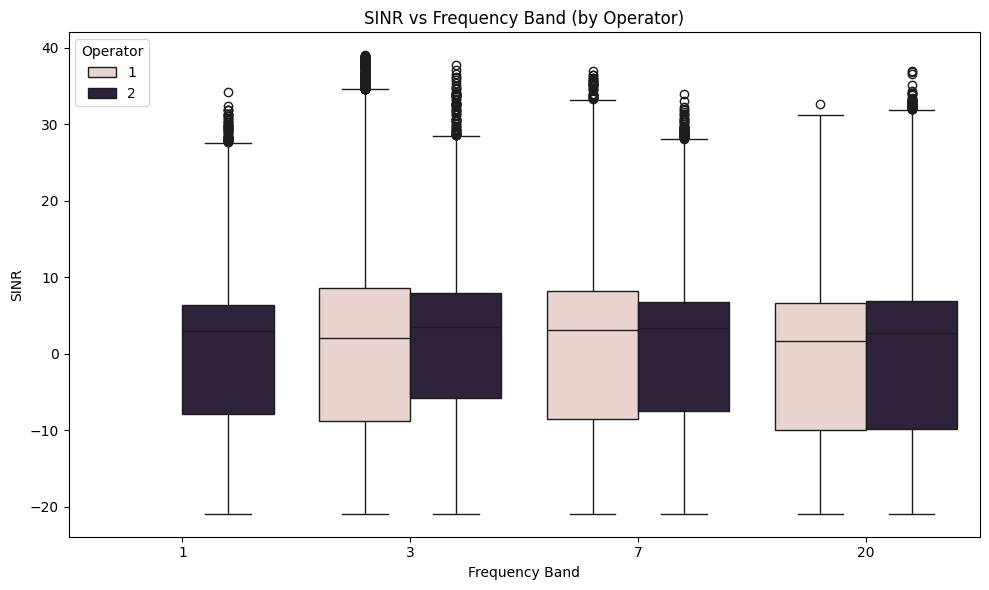

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the relevant columns for frequency and signal strength analysis
filtered_data = fd_4g[['RSRP', 'SINR', 'EARFCN', 'Band', 'MNC_numeric']].dropna()

# Create a boxplot for RSRP vs Band, differentiated by operator
def plot_signal_strength_vs_band(signal_metric):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Band', y=signal_metric, hue='MNC_numeric', data=filtered_data)
    plt.title(f'{signal_metric} vs Frequency Band (by Operator)')
    plt.xlabel('Frequency Band')
    plt.ylabel(signal_metric)
    plt.legend(title='Operator')
    plt.tight_layout()
    plt.show()

# Boxplot for RSRP
plot_signal_strength_vs_band('RSRP')

# Boxplot for SINR
plot_signal_strength_vs_band('SINR')


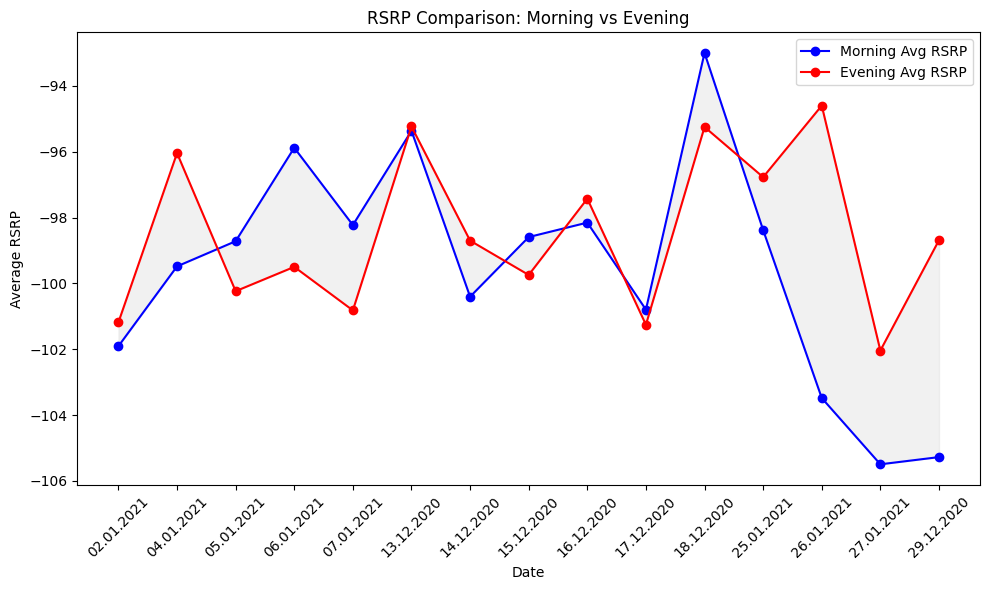

In [25]:
# Assuming your dataset is loaded into 'fd_4g'
# Example: Convert 'Time' column to datetime object with milliseconds
fd_4g['Time'] = pd.to_datetime(fd_4g['Time'], format='%H:%M:%S.%f')

# Filter morning and evening data
morning_data = fd_4g[fd_4g['Time'].dt.hour < 12]  # Morning: 00:00 to 12:00
evening_data = fd_4g[fd_4g['Time'].dt.hour >= 12] # Evening: 12:00 to 24:00

# Group data by 'Date' and calculate the average RSRP for each part of the day
morning_avg_rsrp = morning_data.groupby('Date')['RSRP'].mean().reset_index(name='Morning_Avg_RSRP')
evening_avg_rsrp = evening_data.groupby('Date')['RSRP'].mean().reset_index(name='Evening_Avg_RSRP')

# Merge the morning and evening data
merged_data = pd.merge(morning_avg_rsrp, evening_avg_rsrp, on='Date')

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.plot(merged_data['Date'], merged_data['Morning_Avg_RSRP'], label='Morning Avg RSRP', color='blue', marker='o')
plt.plot(merged_data['Date'], merged_data['Evening_Avg_RSRP'], label='Evening Avg RSRP', color='red', marker='o')
plt.fill_between(merged_data['Date'], merged_data['Morning_Avg_RSRP'], merged_data['Evening_Avg_RSRP'], color='lightgray', alpha=0.3)

plt.title('RSRP Comparison: Morning vs Evening')
plt.xlabel('Date')
plt.ylabel('Average RSRP')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# New Idea:
- lets take All the Indoor campaigns and profile the results per time.


In [27]:
# Filter for the "IS" scenario
indoor_static_data = fd_4g[fd_4g['scenario'] == 'IS']

print(indoor_static_data.head(10))

      Unnamed: 0        Date                    Time           UTC   Latitude  Longitude  Altitude  Speed  EARFCN  Frequency  PCI      MNC  CellIdentity  eNodeB.ID  Power   SINR    RSRP   RSRQ scenario  cellLongitude  cellLatitude  cellPosErrorLambda1  cellPosErrorLambda2  n_CellIdentities    distance  Band                     campaign  MNC_numeric
9629      221085  25.01.2021 1900-01-01 10:49:35.850  1.614247e+09  41.893101  12.494476     57.98   3.60    6300      806.0  199  "Op"[1]      76950017     300586 -63.81   8.84  -87.19 -14.35       IS      12.499596     41.897894             0.551488             0.394731                 6  681.668663    20  campaign_35_IS_4G_speedtest            1
9630      231096  25.01.2021 1900-01-01 10:49:35.850  1.614247e+09  41.893101  12.494476     57.98   3.60    6300      806.0   81  "Op"[1]      77207811     301593 -71.35   0.15  -93.24 -20.39       IS      12.493326     41.892014            10.810001            10.810001                 6  154.02

In [28]:
# Convert UTC column to datetime format
indoor_static_data['datetime'] = pd.to_datetime(indoor_static_data['UTC'], unit='s')
# Define the function to categorize time of day based on hour
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to categorize time of day based on the hour
indoor_static_data['time_of_day'] = indoor_static_data['datetime'].dt.hour.apply(categorize_time_of_day)

sinr_by_time_of_day = indoor_static_data.groupby('time_of_day')

counts_by_time_of_day = sinr_by_time_of_day.size()

# Print the counts
print(counts_by_time_of_day)


time_of_day
Afternoon    48721
Evening       6819
Morning      90772
Night        70339
dtype: int64


C:\Users\elmir\AppData\Local\Temp\ipykernel_11276\482208891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_static_data['datetime'] = pd.to_datetime(indoor_static_data['UTC'], unit='s')
C:\Users\elmir\AppData\Local\Temp\ipykernel_11276\482208891.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_static_data['time_of_day'] = indoor_static_data['datetime'].dt.hour.apply(categorize_time_of_day)


C:\Users\elmir\AppData\Local\Temp\ipykernel_11276\2009019634.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='time_of_day', y='SINR', data=indoor_static_data, palette='Set3')


Text(0.5, 1.0, 'SINR Distribution by Time of Day (Indoor Static Scenario)')

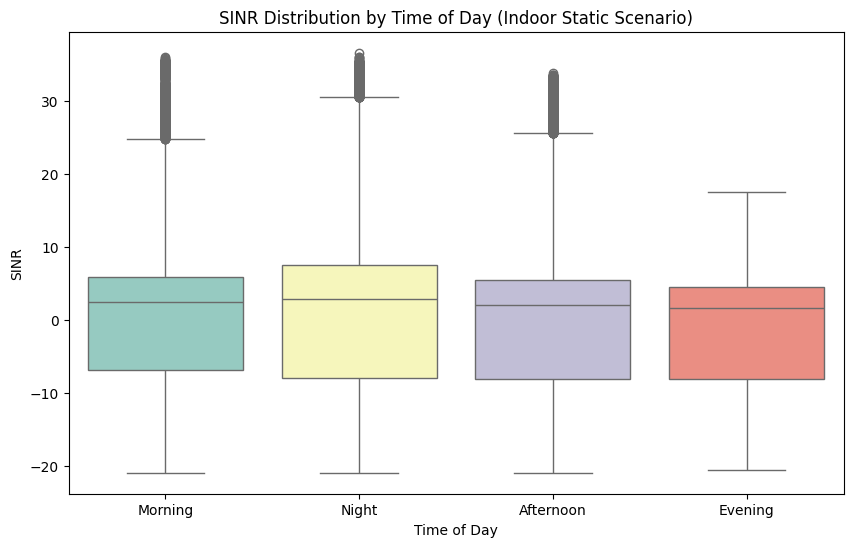

In [29]:
# Create a box plot for SINR distribution by time of day
plt.figure(figsize=(10, 6))
sns.boxplot(x='time_of_day', y='SINR', data=indoor_static_data, palette='Set3')

# Add labels and title
plt.xlabel('Time of Day')
plt.ylabel('SINR')
plt.title('SINR Distribution by Time of Day (Indoor Static Scenario)')

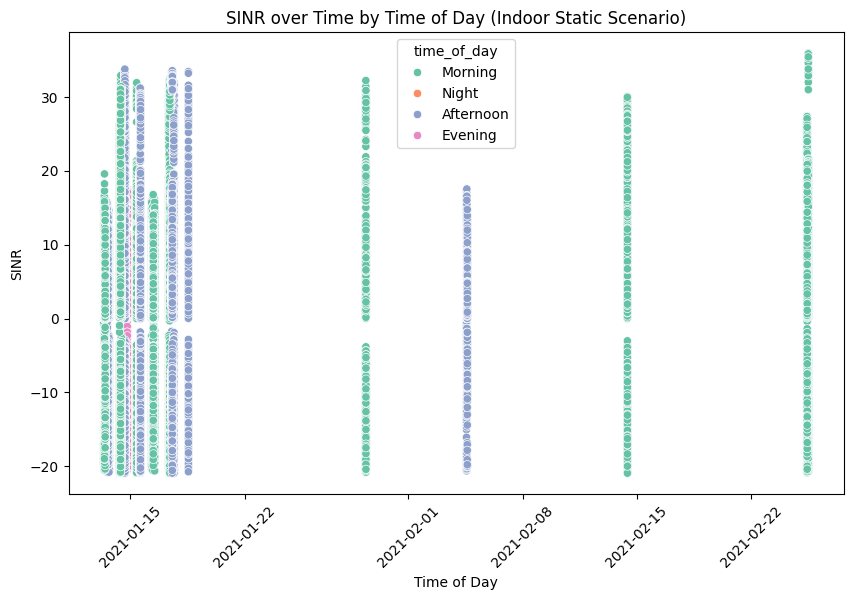

In [30]:
# Create a scatter plot with hue based on time of day
plt.figure(figsize=(10, 6))
sns.scatterplot(x='datetime', y='SINR', hue='time_of_day', data=indoor_static_data, palette='Set2')

# Add labels and title
plt.xlabel('Time of Day')
plt.ylabel('SINR')
plt.title('SINR over Time by Time of Day (Indoor Static Scenario)')
plt.xticks(rotation=45)

# Show the plot
plt.show()


C:\Users\elmir\AppData\Local\Temp\ipykernel_11276\264884049.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_static_data['hour_of_day'] = indoor_static_data['datetime'].dt.hour


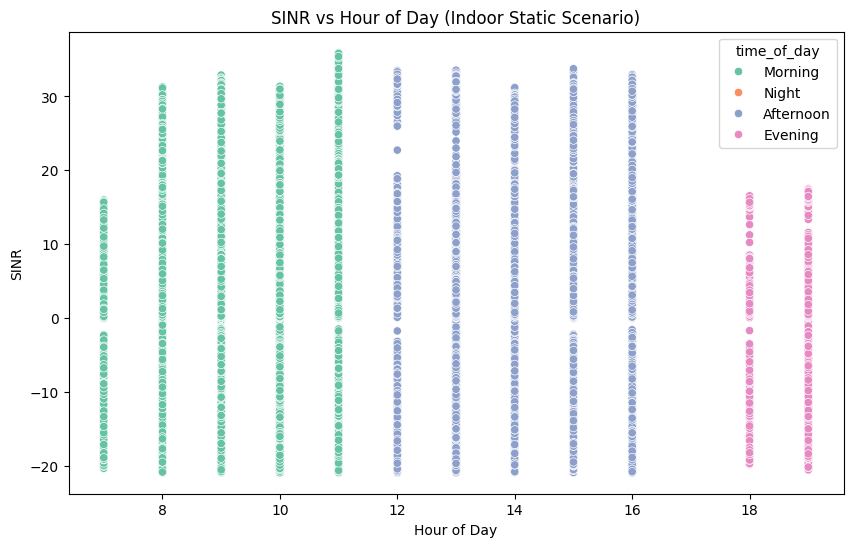

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the hour from the datetime for a better x-axis
indoor_static_data['hour_of_day'] = indoor_static_data['datetime'].dt.hour

# Create a scatter plot with hour of day on the x-axis and SINR on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hour_of_day', y='SINR', hue='time_of_day', data=indoor_static_data, palette='Set2')

# Add labels and title
plt.xlabel('Hour of Day')
plt.ylabel('SINR')
plt.title('SINR vs Hour of Day (Indoor Static Scenario)')

# Show the plot
plt.show()


In [26]:
#indoor_static_data['datetime'] = pd.to_datetime(indoor_static_data['UTC'], unit='s')
#print(indoor_static_data.head(10))

In [32]:
# Convert 'Time' to pandas datetime (if it isn't already)
indoor_static_data['time_of_day'] = pd.to_datetime(indoor_static_data['Time']).dt.time

# Check if it worked by printing the head of the data
print(indoor_static_data[['time_of_day']].head())

          time_of_day
9629  10:49:35.850000
9630  10:49:35.850000
9631  10:49:43.362000
9632  10:49:43.362000
9633  10:49:43.617000


C:\Users\elmir\AppData\Local\Temp\ipykernel_11276\3594857857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_static_data['time_of_day'] = pd.to_datetime(indoor_static_data['Time']).dt.time


C:\Users\elmir\AppData\Local\Temp\ipykernel_11276\641008924.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is_data['MNC_numeric'] = is_data['MNC'].str.extract(r'\[(\d+)\]')  # Extract the number inside the brackets
C:\Users\elmir\AppData\Local\Temp\ipykernel_11276\641008924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is_data['MNC_numeric'] = pd.to_numeric(is_data['MNC_numeric'])  # Convert to numeric for easier filtering


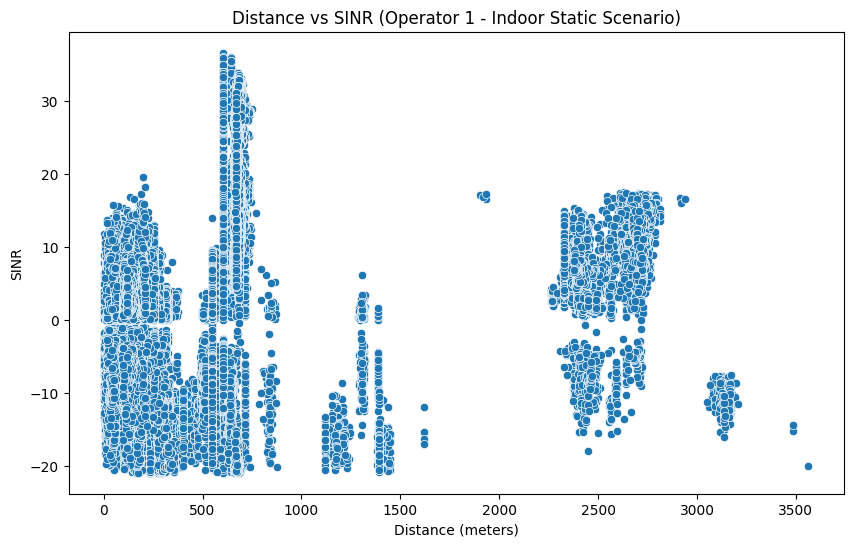

In [33]:
indoor_static_data = fd_4g[fd_4g['scenario'] == 'IS']

# Filter the dataset for only the "IS" scenario
is_data = fd_4g[fd_4g['scenario'] == 'IS']

# Extract the numeric part of the MNC field by using string manipulation
is_data['MNC_numeric'] = is_data['MNC'].str.extract(r'\[(\d+)\]')  # Extract the number inside the brackets
is_data['MNC_numeric'] = pd.to_numeric(is_data['MNC_numeric'])  # Convert to numeric for easier filtering

# Filter data for each operator
op1_is_data = is_data[is_data['MNC_numeric'] == 1]  # Operator 1
op2_is_data = is_data[is_data['MNC_numeric'] == 2]  # Opeurator 2


# Scatter plot of distance vs SINR
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='SINR', data=op1_is_data)

# Add labels and title
plt.xlabel('Distance (meters)')
plt.ylabel('SINR')
plt.title('Distance vs SINR (Operator 1 - Indoor Static Scenario)')

# Show the plot
plt.show()


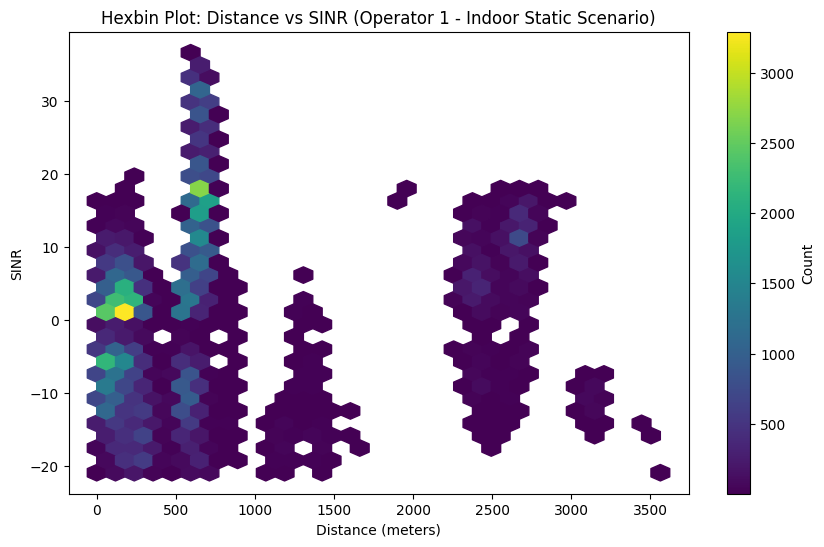

In [34]:
# Hexbin plot for distance vs SINR
plt.figure(figsize=(10, 6))
plt.hexbin(op1_is_data['distance'], op1_is_data['SINR'], gridsize=30, cmap='viridis', mincnt=1)

# Add colorbar, labels, and title
plt.colorbar(label='Count')
plt.xlabel('Distance (meters)')
plt.ylabel('SINR')
plt.title('Hexbin Plot: Distance vs SINR (Operator 1 - Indoor Static Scenario)')

plt.show()


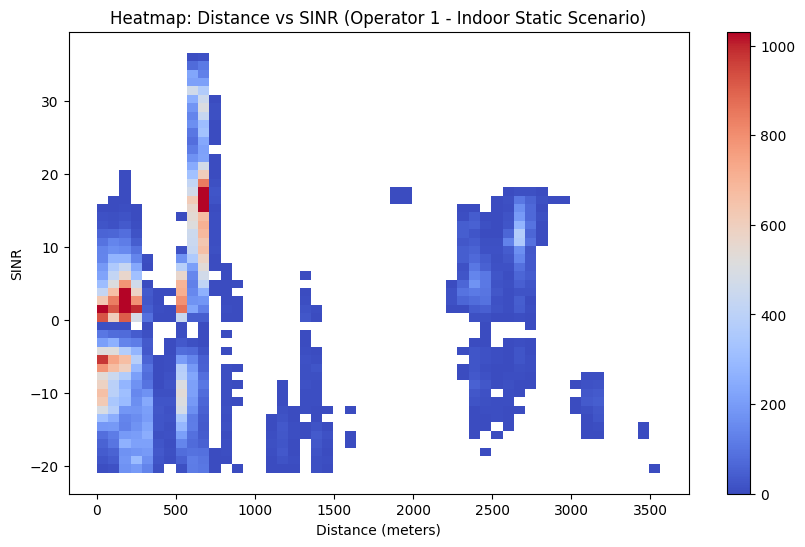

In [35]:
# Create heatmap using 2D histogram
plt.figure(figsize=(10, 6))
sns.histplot(x='distance', y='SINR', data=op1_is_data, bins=50, pmax=0.9, cbar=True, cmap='coolwarm')

# Add labels and title
plt.xlabel('Distance (meters)')
plt.ylabel('SINR')
plt.title('Heatmap: Distance vs SINR (Operator 1 - Indoor Static Scenario)')

plt.show()


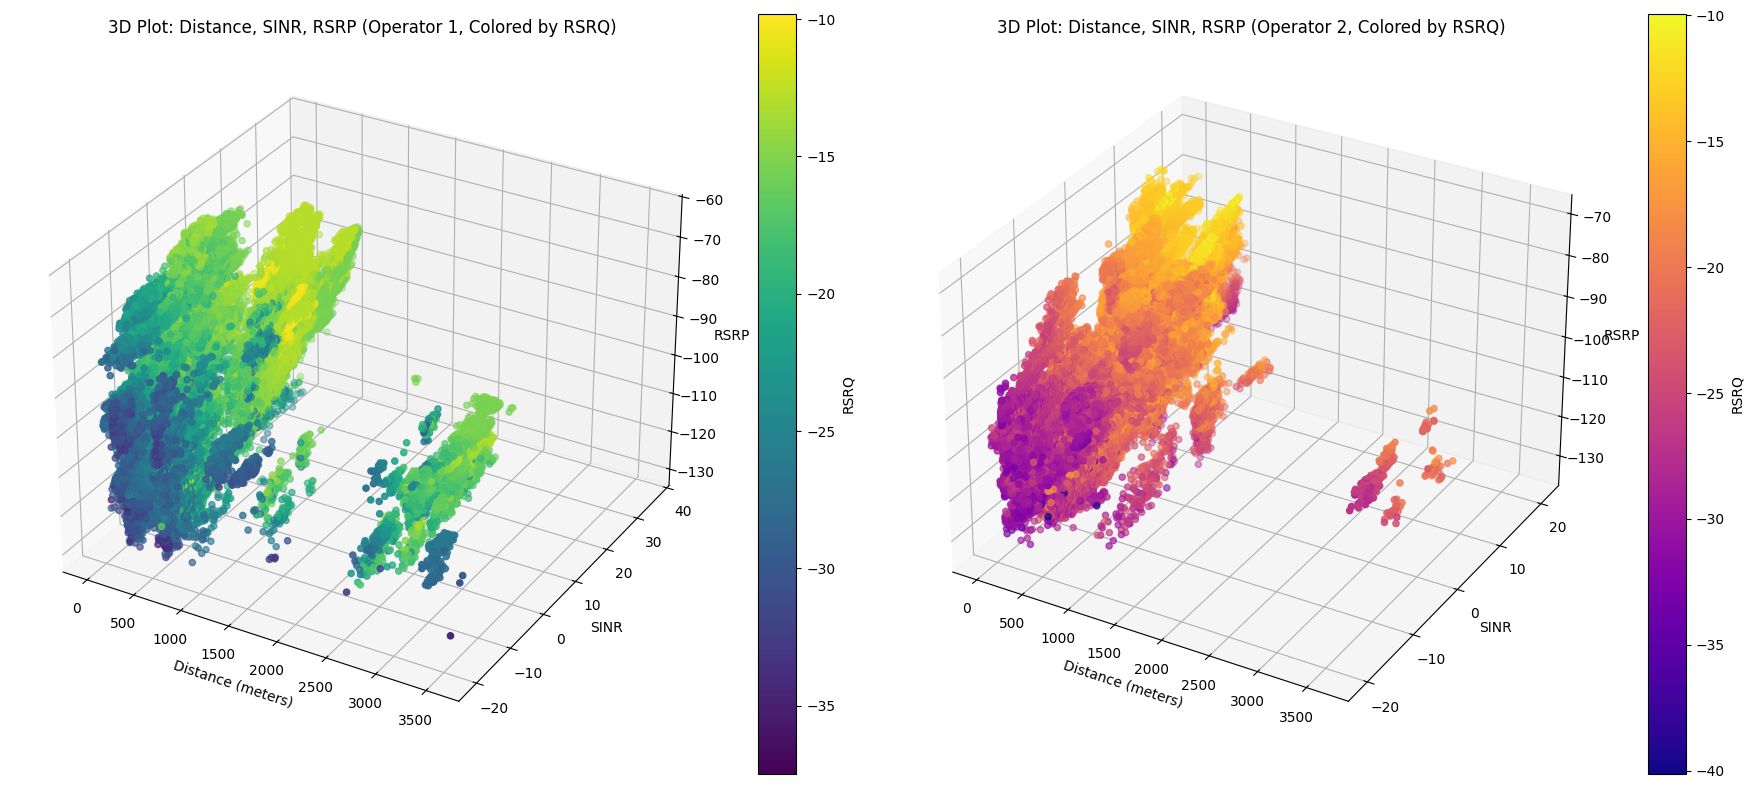

In [36]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create a figure for subplots
fig = plt.figure(figsize=(18, 8))

# First subplot for Operator 1
ax1 = fig.add_subplot(121, projection='3d')
sc1 = ax1.scatter(op1_is_data['distance'], op1_is_data['SINR'], op1_is_data['RSRP'], c=op1_is_data['RSRQ'], cmap='viridis')

# Add labels and title for Operator 1
ax1.set_xlabel('Distance (meters)')
ax1.set_ylabel('SINR')
ax1.set_zlabel('RSRP')
ax1.set_title('3D Plot: Distance, SINR, RSRP (Operator 1, Colored by RSRQ)')

# Add colorbar for Operator 1
plt.colorbar(sc1, ax=ax1, label='RSRQ')

# Second subplot for Operator 2
ax2 = fig.add_subplot(122, projection='3d')
sc2 = ax2.scatter(op2_is_data['distance'], op2_is_data['SINR'], op2_is_data['RSRP'], c=op2_is_data['RSRQ'], cmap='plasma')

# Add labels and title for Operator 2
ax2.set_xlabel('Distance (meters)')
ax2.set_ylabel('SINR')
ax2.set_zlabel('RSRP')
ax2.set_title('3D Plot: Distance, SINR, RSRP (Operator 2, Colored by RSRQ)')

# Add colorbar for Operator 2
plt.colorbar(sc2, ax=ax2, label='RSRQ')

# Show the plots
plt.tight_layout()
plt.show()


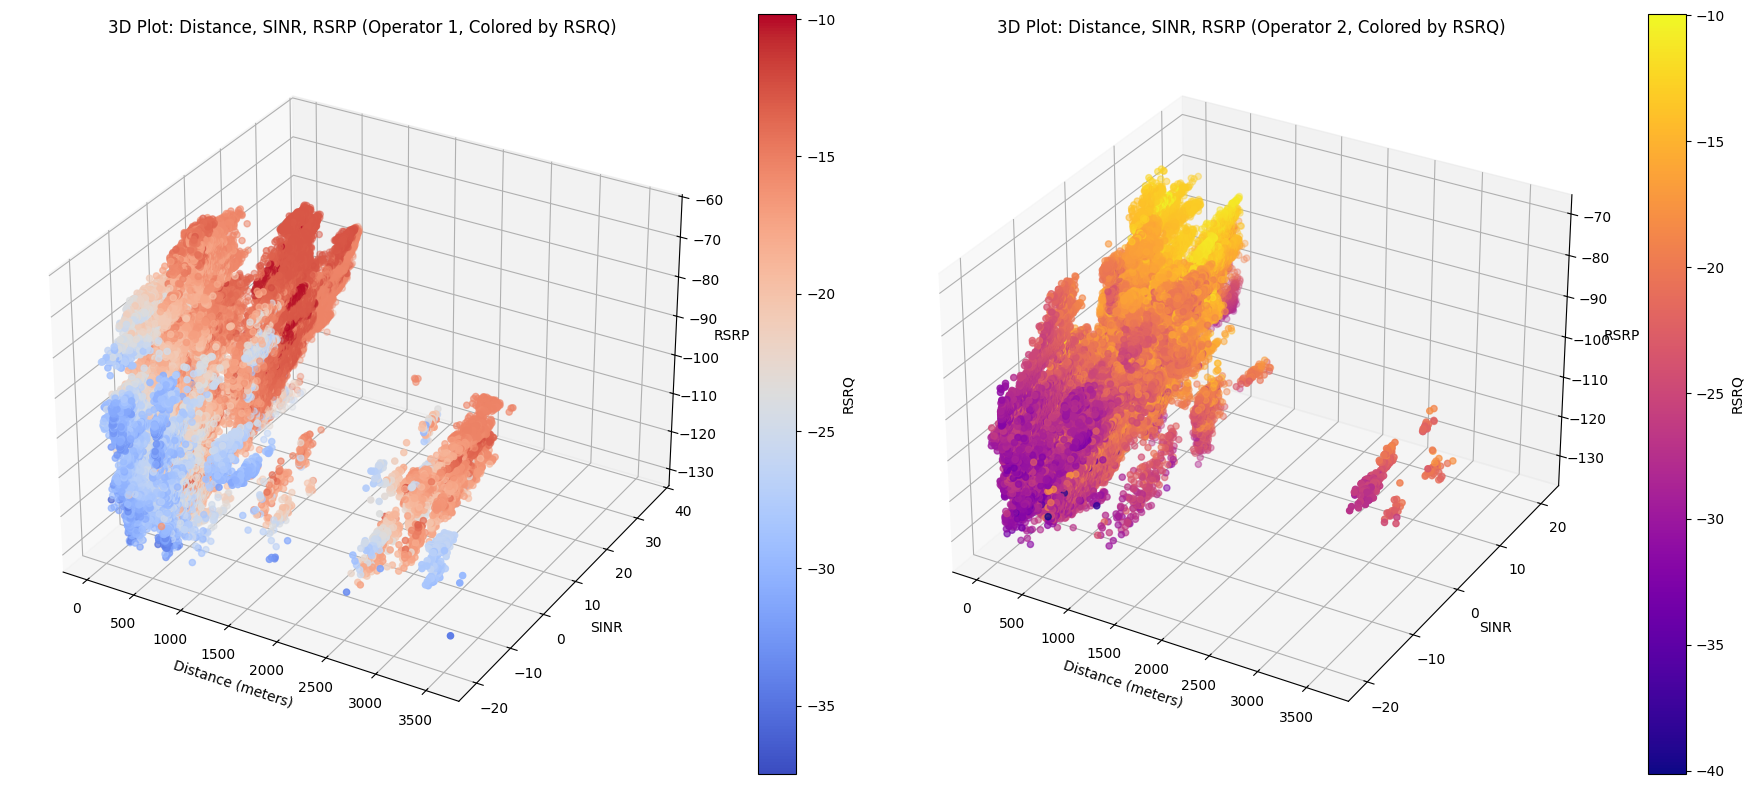

In [37]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create a figure for subplots (two 3D plots)
fig = plt.figure(figsize=(18, 8))

# First subplot for Operator 1
ax1 = fig.add_subplot(121, projection='3d')
sc1 = ax1.scatter(op1_is_data['distance'], op1_is_data['SINR'], op1_is_data['RSRP'], c=op1_is_data['RSRQ'], cmap='coolwarm')

# Add labels and title for Operator 1
ax1.set_xlabel('Distance (meters)')
ax1.set_ylabel('SINR')
ax1.set_zlabel('RSRP')
ax1.set_title('3D Plot: Distance, SINR, RSRP (Operator 1, Colored by RSRQ)')

# Add colorbar for Operator 1
plt.colorbar(sc1, ax=ax1, label='RSRQ')

# Second subplot for Operator 2
ax2 = fig.add_subplot(122, projection='3d')
sc2 = ax2.scatter(op2_is_data['distance'], op2_is_data['SINR'], op2_is_data['RSRP'], c=op2_is_data['RSRQ'], cmap='plasma')

# Add labels and title for Operator 2
ax2.set_xlabel('Distance (meters)')
ax2.set_ylabel('SINR')
ax2.set_zlabel('RSRP')
ax2.set_title('3D Plot: Distance, SINR, RSRP (Operator 2, Colored by RSRQ)')

# Add colorbar for Operator 2
plt.colorbar(sc2, ax=ax2, label='RSRQ')

# Show the plots side by side
plt.tight_layout()
plt.show()



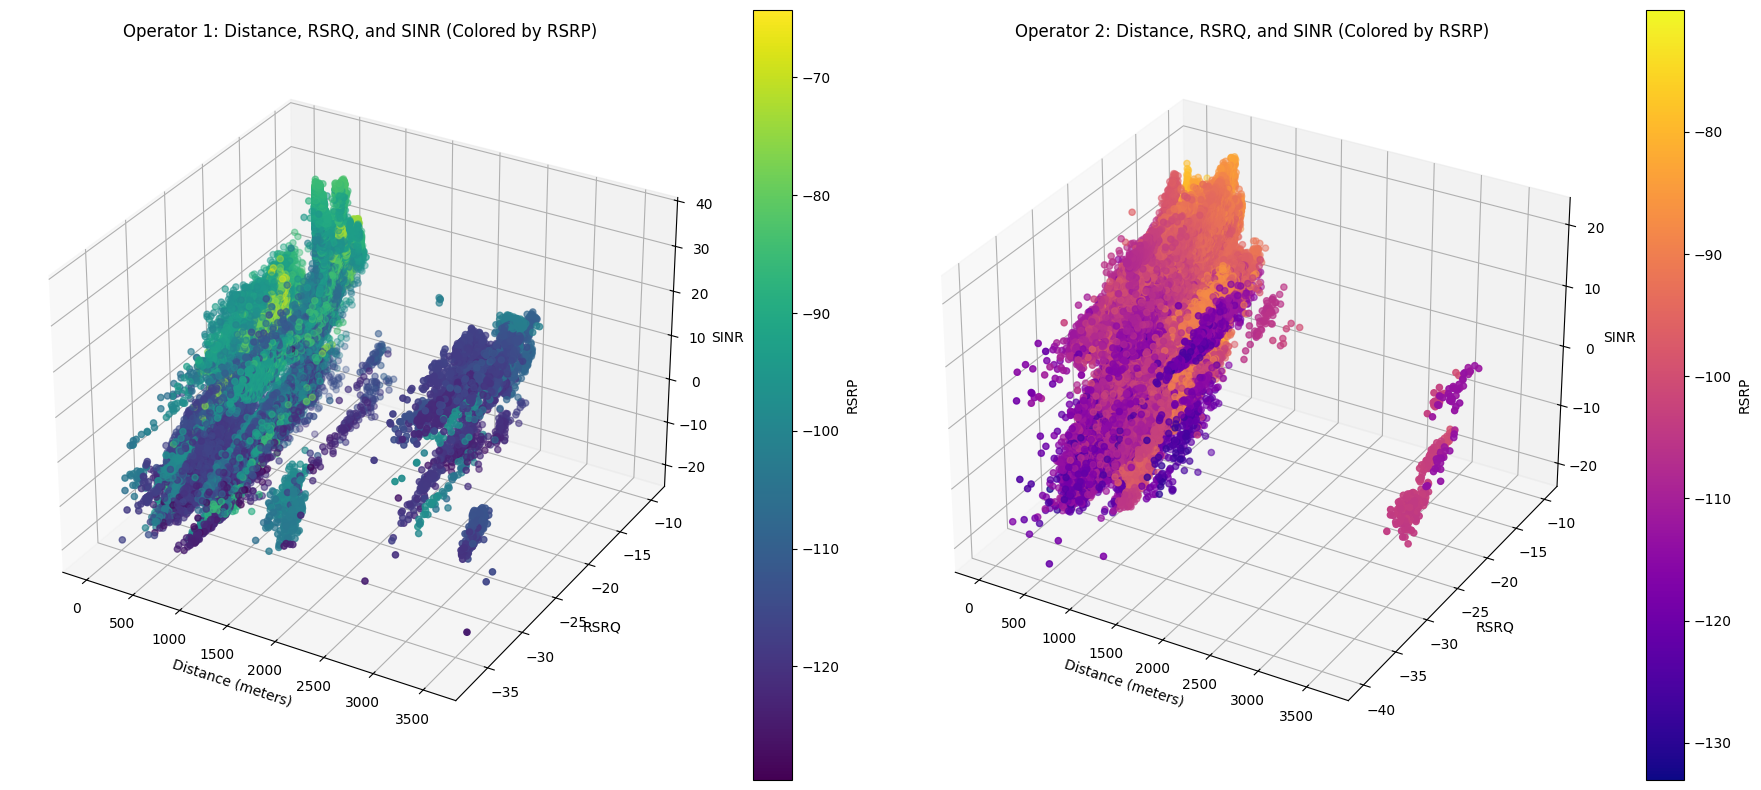

In [38]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create a figure for subplots (two 3D plots)
fig = plt.figure(figsize=(18, 8))

# First subplot for Operator 1
ax1 = fig.add_subplot(121, projection='3d')
sc1 = ax1.scatter(op1_is_data['distance'], op1_is_data['RSRQ'], op1_is_data['SINR'], c=op1_is_data['RSRP'], cmap='viridis')

# Add labels and title for Operator 1
ax1.set_xlabel('Distance (meters)')
ax1.set_ylabel('RSRQ')
ax1.set_zlabel('SINR')
ax1.set_title('Operator 1: Distance, RSRQ, and SINR (Colored by RSRP)')

# Add colorbar for Operator 1
plt.colorbar(sc1, ax=ax1, label='RSRP')

# Second subplot for Operator 2
ax2 = fig.add_subplot(122, projection='3d')
sc2 = ax2.scatter(op2_is_data['distance'], op2_is_data['RSRQ'], op2_is_data['SINR'], c=op2_is_data['RSRP'], cmap='plasma')

# Add labels and title for Operator 2
ax2.set_xlabel('Distance (meters)')
ax2.set_ylabel('RSRQ')
ax2.set_zlabel('SINR')
ax2.set_title('Operator 2: Distance, RSRQ, and SINR (Colored by RSRP)')

# Add colorbar for Operator 2
plt.colorbar(sc2, ax=ax2, label='RSRP')

# Show the plots side by side
plt.tight_layout()
plt.show()


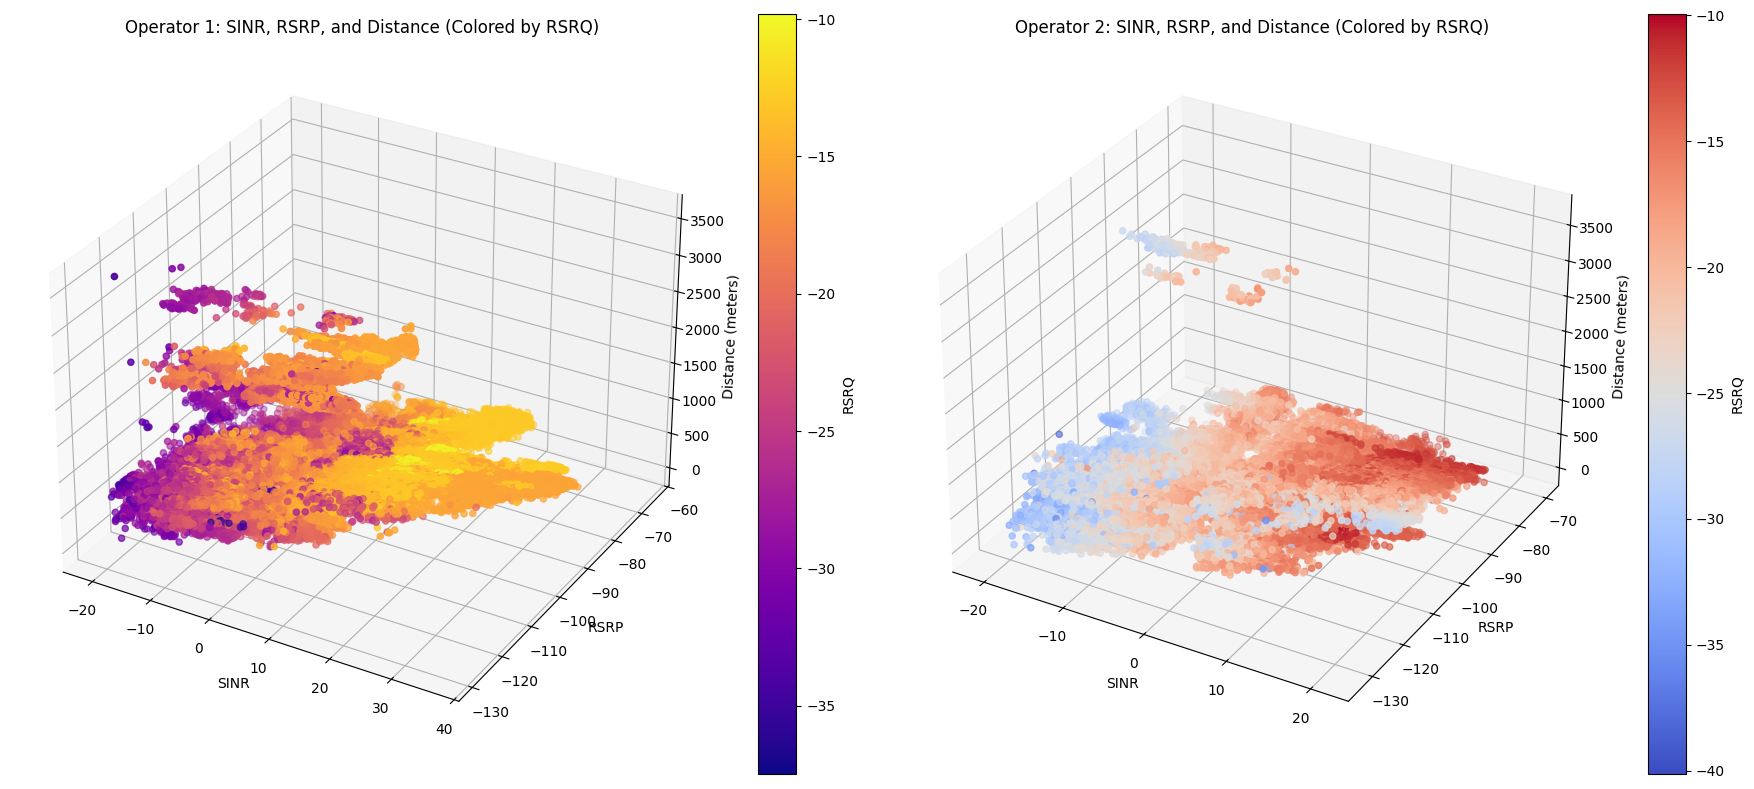

In [39]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create a figure for subplots (two 3D plots)
fig = plt.figure(figsize=(18, 8))

# First subplot for Operator 1
ax1 = fig.add_subplot(121, projection='3d')
sc1 = ax1.scatter(op1_is_data['SINR'], op1_is_data['RSRP'], op1_is_data['distance'], c=op1_is_data['RSRQ'], cmap='plasma')

# Add labels and title for Operator 1
ax1.set_xlabel('SINR')
ax1.set_ylabel('RSRP')
ax1.set_zlabel('Distance (meters)')
ax1.set_title('Operator 1: SINR, RSRP, and Distance (Colored by RSRQ)')

# Add colorbar for Operator 1
plt.colorbar(sc1, ax=ax1, label='RSRQ')

# Second subplot for Operator 2
ax2 = fig.add_subplot(122, projection='3d')
sc2 = ax2.scatter(op2_is_data['SINR'], op2_is_data['RSRP'], op2_is_data['distance'], c=op2_is_data['RSRQ'], cmap='coolwarm')

# Add labels and title for Operator 2
ax2.set_xlabel('SINR')
ax2.set_ylabel('RSRP')
ax2.set_zlabel('Distance (meters)')
ax2.set_title('Operator 2: SINR, RSRP, and Distance (Colored by RSRQ)')

# Add colorbar for Operator 2
plt.colorbar(sc2, ax=ax2, label='RSRQ')

# Show the plots side by side
plt.tight_layout()
plt.show()


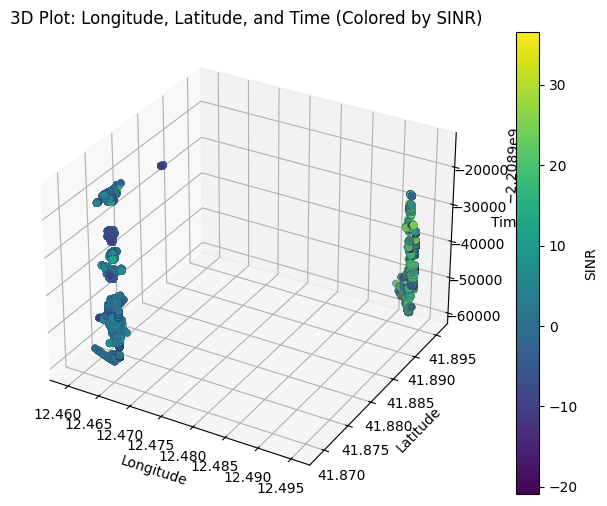

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have 'longitude', 'latitude', 'Time', and 'SINR' in your data

# Convert your time column to a numerical format if needed (e.g., convert timestamps to numerical values)
# If it's already in numerical form (e.g., seconds or hours), you can skip this step.
time_numeric = pd.to_datetime(op1_is_data['Time']).astype(int) / 10**9  # Convert to Unix timestamp in seconds

# Create the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with Longitude on x, Latitude on y, Time on z, and SINR as color
sc = ax.scatter(op1_is_data['Longitude'], op1_is_data['Latitude'], time_numeric, c=op1_is_data['SINR'], cmap='viridis')

# Add axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Time')

# Add colorbar for SINR
cbar = plt.colorbar(sc, label='SINR')

# Add title
ax.set_title('3D Plot: Longitude, Latitude, and Time (Colored by SINR)')

plt.show()


# Attempt at Temporal and Positional analysis

In [41]:
df = pd.read_csv('Data/4G_Passive_measurements.csv')

# Convert the Time column into datetime format for easier grouping
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S.%f')
# Extract only the hour from the time for grouping
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour


# Group by Hour and optionally PCI, then calculate the mean SINR
df_grouped = df.groupby(['Hour', 'PCI']).agg({'SINR': 'mean'}).reset_index()

# Rename the columns for clarity
df_grouped.columns = ['Hour', 'PCI', 'Mean_SINR']

# Show the result
print(df_grouped) 

# Sort the dataframe by PCI and Hour
df_grouped_sorted = df_grouped.sort_values(by=['PCI', 'Hour'])

# Print the sorted dataframe
print(df_grouped_sorted)





      Hour  PCI  Mean_SINR
0        7    8  -8.532667
1        7   11  -4.127198
2        7   12        NaN
3        7   13  -2.050136
4        7   33   7.786828
...    ...  ...        ...
3456    20  323   6.044008
3457    20  351   2.540406
3458    20  451   6.580299
3459    20  463  16.104027
3460    20  498 -15.552639

[3461 rows x 3 columns]
      Hour  PCI  Mean_SINR
75       8    1   1.656427
290      9    1  -2.164861
569     10    1  -1.386288
812     11    1  -2.133704
1089    12    1  -5.602562
...    ...  ...        ...
811     10  503   6.337258
1088    11  503   6.789863
2522    16  503   7.141875
2859    17  503  10.605000
3209    18  503   5.790000

[3461 rows x 3 columns]


In [43]:
# Plot each PCI as a separate line
#for pci in df_grouped_sorted['PCI'].unique():
#    pci_data = df_grouped_sorted[df_grouped_sorted['PCI'] == pci]
#    plt.plot(pci_data['Hour'], pci_data['Mean_SINR'], marker='o', label=f'PCI {pci}')
#
# Add labels and title
#plt.xlabel('Hour of the Day (00:00 - 24:00)')
#plt.ylabel('Mean SINR')
#plt.title('Mean SINR per Hour for Different PCIs')
#plt.xticks(range(0, 24))  # Ensures x-axis goes from 0 to 23 hours
#plt.grid(True)
#plt.legend(loc='upper right')
#plt.show()

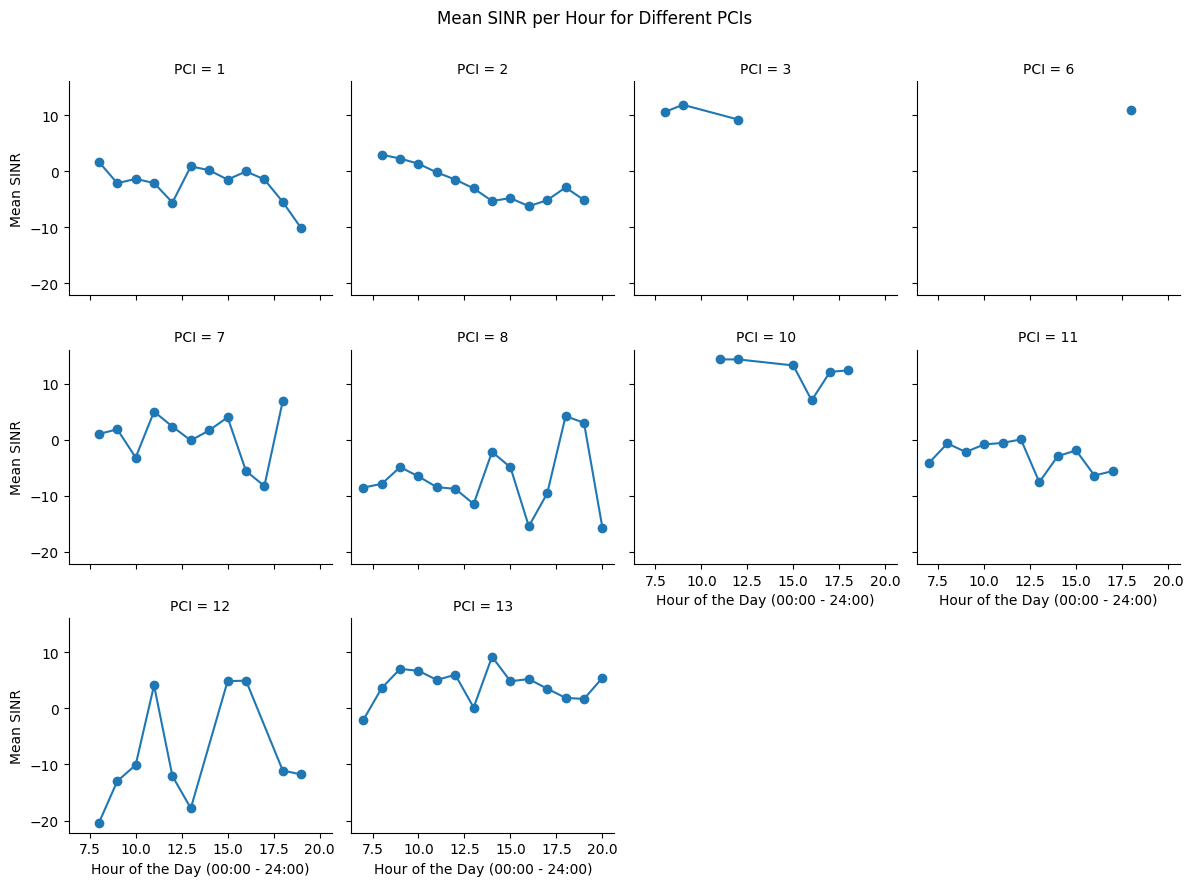

In [44]:
# Ensure PCI and Hour are in the correct format
df_grouped_sorted['Hour'] = df_grouped_sorted['Hour'].astype(int)
df_grouped_sorted['PCI'] = df_grouped_sorted['PCI'].astype(int)

# Try limiting the number of PCIs if too many subplots are overwhelming
df_filtered = df_grouped_sorted[df_grouped_sorted['PCI'].isin(df_grouped_sorted['PCI'].unique()[:10])]  # limit to 10 PCIs for example

# Adjust figure size and use a smaller number of columns if needed
g = sns.FacetGrid(df_filtered, col='PCI', col_wrap=4, height=3)

# Plot the data
g.map(plt.plot, 'Hour', 'Mean_SINR', marker='o')

# Add axis labels and titles
g.set_axis_labels('Hour of the Day (00:00 - 24:00)', 'Mean SINR')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Mean SINR per Hour for Different PCIs')
plt.show()

In [52]:
# Count how many unique Hour-PCI groups exist for each PCI
pci_group_counts = df_grouped_sorted.groupby('PCI')['Hour'].nunique()

# Filter to keep only the PCIs that have more than 5 Hour-PCI groups
valid_pcis = pci_group_counts[pci_group_counts > 10].index

# Filter the original dataframe to keep only the valid PCIs
df_filtered = df_grouped_sorted[df_grouped_sorted['PCI'].isin(valid_pcis)]

# Show the filtered data
print(df_filtered)


      Hour  PCI  Mean_SINR
75       8    1   1.656427
290      9    1  -2.164861
569     10    1  -1.386288
812     11    1  -2.133704
1089    12    1  -5.602562
...    ...  ...        ...
2519    16  498 -13.783333
2855    17  498  -9.250000
3205    18  498  -5.363288
3431    19  498  -2.925000
3460    20  498 -15.552639

[1408 rows x 3 columns]


In [47]:
# Count the number of unique Hour-PCI groups for each PCI
pci_group_counts = df_grouped_sorted.groupby('PCI')['Hour'].nunique()

# Filter to keep only the PCIs that have more than 5 Hour-PCI groups
valid_pcis = pci_group_counts[pci_group_counts > 10].index

# Filter the original dataframe to keep only the valid PCIs
df_filtered = df_grouped_sorted[df_grouped_sorted['PCI'].isin(valid_pcis)]

# Show the filtered data to ensure the correct PCIs are included
print(df_filtered)

# Plot the Mean SINR for each PCI over the hours
#plt.figure(figsize=(12,6))

# Plot each PCI as a separate line
#for pci in df_filtered['PCI'].unique():
#    pci_data = df_filtered[df_filtered['PCI'] == pci]
#    plt.plot(pci_data['Hour'], pci_data['Mean_SINR'], marker='o', label=f'PCI {pci}')

# Add labels and title
#plt.xlabel('Hour of the Day (00:00 - 24:00)')
#plt.ylabel('Mean SINR')
#plt.title('Mean SINR per Hour for PCIs with More Than 10 Hour-PCI Groups')
#plt.xticks(range(0, 24))  # Ensures x-axis goes from 0 to 23 hours
#plt.grid(True)

# Show the legend
#plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Display the plot
#plt.show()


      Hour  PCI  Mean_SINR
75       8    1   1.656427
290      9    1  -2.164861
569     10    1  -1.386288
812     11    1  -2.133704
1089    12    1  -5.602562
...    ...  ...        ...
2519    16  498 -13.783333
2855    17  498  -9.250000
3205    18  498  -5.363288
3431    19  498  -2.925000
3460    20  498 -15.552639

[1408 rows x 3 columns]


In [48]:
import matplotlib.pyplot as plt

# Step 1: Group by PCI and count how many unique hours each PCI has
pci_group_counts = df_grouped_sorted.groupby('PCI')['Hour'].nunique()

# Step 2: Filter to keep only the PCIs that have more than 10 Hour-PCI groups
valid_pcis = pci_group_counts[pci_group_counts > 10].index

# Step 3: Filter the original dataframe to keep only the valid PCIs
df_filtered = df_grouped_sorted[df_grouped_sorted['PCI'].isin(valid_pcis)]

# Step 4: Plot the Mean SINR for each PCI over the hours
#plt.figure(figsize=(12,6))

# Iterate over each unique PCI in the filtered data
#for pci in df_filtered['PCI'].unique():
#    pci_data = df_filtered[df_filtered['PCI'] == pci]
    
    # Plot each PCI as a separate line
#    plt.plot(pci_data['Hour'], pci_data['Mean_SINR'], marker='o', label=f'PCI {pci}')

# Add axis labels and title
#plt.xlabel('Hour of the Day (00:00 - 24:00)')
#plt.ylabel('Mean SINR')
#plt.title('Mean SINR per Hour for PCIs with More Than 10 Hour-PCI Groups')

# Ensure x-axis goes from 0 to 23 hours
#plt.xticks(range(0, 24))

# Enable grid
#plt.grid(True)

# Show the legend (moving it outside the plot if needed)
#plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Step 5: Display the plot
#plt.show()


In [50]:
# Filter PCIs with more than 5 hours of data, for example
valid_pcis = pci_group_counts[pci_group_counts > 10].index
df_filtered = df_grouped_sorted[df_grouped_sorted['PCI'].isin(valid_pcis)]

# Pivot the filtered data
df_pivot_filtered = df_filtered.pivot(index='PCI', columns='Hour', values='Mean_SINR')

# Plot the heatmap
#plt.figure(figsize=(15,10))
#sns.heatmap(df_pivot_filtered, annot=False, cmap='coolwarm', cbar_kws={'label': 'Mean SINR'}, linewidths=0.5)
#plt.xlabel('Hour of the Day (00:00 - 24:00)')
#plt.ylabel('PCI')
#plt.title('Heatmap of Mean SINR per Hour for Filtered PCIs')
#plt.show()


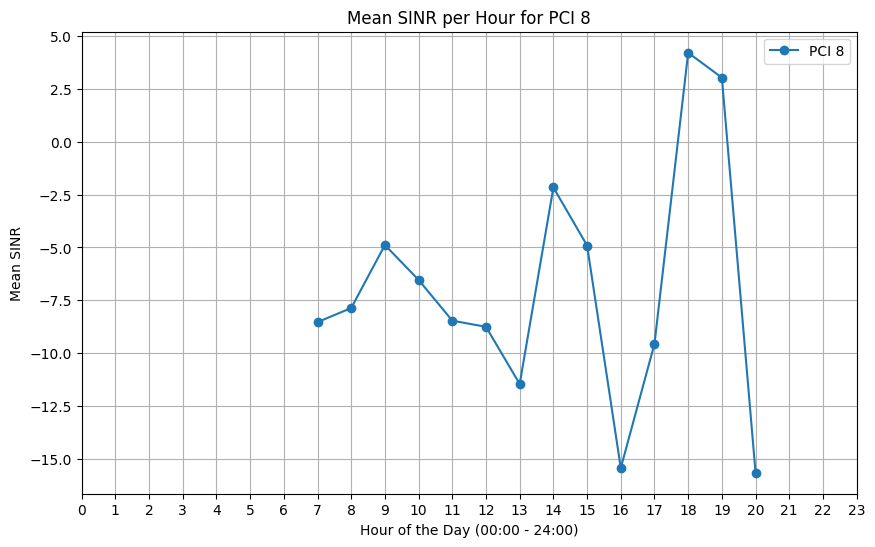

In [51]:
# Replace 'your_pci_value' with the specific PCI you want to plot
selected_pci = 8  # Example PCI value, change this as needed

# Filter for that single PCI
df_single_pci = df_filtered[df_filtered['PCI'] == selected_pci]

# Plot for the single PCI
plt.figure(figsize=(10,6))
plt.plot(df_single_pci['Hour'], df_single_pci['Mean_SINR'], marker='o', label=f'PCI {selected_pci}')

# Add axis labels and title
plt.xlabel('Hour of the Day (00:00 - 24:00)')
plt.ylabel('Mean SINR')
plt.title(f'Mean SINR per Hour for PCI {selected_pci}')
plt.xticks(range(0, 24))
plt.grid(True)

# Show the legend
plt.legend()

# Display the plot
plt.show()


# New 10/11/2024


In [52]:
data = fd_4g

# Extract the numeric part of the MNC field by using string manipulation
data['MNC_numeric'] = data['MNC'].str.extract(r'\[(\d+)\]')  # Extract the number inside the brackets
data['MNC_numeric'] = pd.to_numeric(data['MNC_numeric'])  # Convert to numeric for easier filtering

# Filter data for each operator
op1_data = data[data['MNC_numeric'] == 1]  # Operator 1
op2_data = data[data['MNC_numeric'] == 2]  # Opeurator 2


# Group the data by eNodeB.ID and count the number of measurements for each eNodeB
enodeb_counts_op1 = op1_data.groupby('eNodeB.ID').size().reset_index(name='measurement_count')
enodeb_counts_op2 = op2_data.groupby('eNodeB.ID').size().reset_index(name='measurement_count')

# Sort by measurement_count to find the eNodeBs with the most measurements
top_enodebs_op1 = enodeb_counts_op1.sort_values(by='measurement_count', ascending=False).head(10)
top_enodebs_op2 = enodeb_counts_op2.sort_values(by='measurement_count', ascending=False).head(10)

# Display the top 10 eNodeBs with the most measurements for both operator 1 and operator 2
#print(f'Operator 1 Data: \n {top_enodebs_op1}')
#print(f'Operator 2 Data: \n {top_enodebs_op2}')

In [53]:
# Get the eNodeB.ID with the most measurements
most_measured_enodeb = top_enodebs_op1.iloc[0]['eNodeB.ID']
# Filter the data for this specific eNodeB.ID
most_measured_data = op1_data[op1_data['eNodeB.ID'] == most_measured_enodeb]

In [54]:
import folium
from folium.plugins import HeatMap
import numpy as np

# Get the eNodeB.ID with the most measurements
most_measured_enodeb = top_enodebs_op1.iloc[0]['eNodeB.ID']

# Filter the data for this specific eNodeB.ID and drop any rows with NaN values in relevant columns
most_measured_data = op1_data[op1_data['eNodeB.ID'] == most_measured_enodeb].dropna(subset=['Latitude', 'Longitude', 'SINR'])

# Create a map centered around the eNodeB's location with simpler background (CartoDB Positron)
map_center = [most_measured_data.iloc[0]['cellLatitude'], most_measured_data.iloc[0]['cellLongitude']]
m = folium.Map(location=map_center, zoom_start=13, tiles='CartoDB positron')

# Add a marker for the eNodeB itself (the base station)
folium.Marker(
    location=[most_measured_data.iloc[0]['cellLatitude'], most_measured_data.iloc[0]['cellLongitude']],
    popup=f"eNodeB ID: {most_measured_enodeb}",
    icon=folium.Icon(color='red', icon='info-sign')
).add_to(m)

# Prepare data for heatmap [latitude, longitude, SINR]
heat_data = [[row['Latitude'], row['Longitude'], row['SINR']] for index, row in most_measured_data.iterrows()]

# Adjust the heatmap settings for better visualization
HeatMap(heat_data, min_opacity=0.3, radius=25, blur=15, max_zoom=1, gradient={0.2: 'blue', 0.4: 'cyan', 0.6: 'lime', 0.8: 'yellow', 1.0: 'red'}).add_to(m)

# Display the map

#We dont display the map because it takes too much size
#m


In [55]:
import folium
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
import base64
from io import BytesIO

# Generate the color bar image and return it as a base64 string
def create_colorbar_base64(cmap, vmin, vmax):
    fig, ax = plt.subplots(figsize=(1.5, 6))  # Increase the size (width=1.5, height=6 for better visibility)
    norm = Normalize(vmin=vmin, vmax=vmax)
    fig.subplots_adjust(right=0.5)
    
    # Create the colorbar
    cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='vertical')
    cb1.set_label('SINR', fontsize=12)  # Adjust the label font size
    
    # Save the image to a BytesIO object
    img = BytesIO()
    plt.savefig(img, format='png', bbox_inches='tight', pad_inches=0.1, dpi=300)  # Save at higher dpi for quality
    plt.close()
    
    # Encode the image as base64
    img.seek(0)
    return base64.b64encode(img.read()).decode('utf-8')

# Get the SINR values for the min and max range
vmin = most_measured_data['SINR'].min()
vmax = most_measured_data['SINR'].max()

# Generate the base64 color bar image
colorbar_base64 = create_colorbar_base64(plt.get_cmap('RdYlBu'), vmin, vmax)

# Create a folium map centered on the eNodeB
map_center = [most_measured_data.iloc[0]['cellLatitude'], most_measured_data.iloc[0]['cellLongitude']]
m = folium.Map(location=map_center, zoom_start=13, tiles='CartoDB positron')

# Add a marker for the eNodeB itself
folium.Marker(location=map_center, popup=f"eNodeB ID: {most_measured_enodeb}", icon=folium.Icon(color='red')).add_to(m)

# Normalize SINR values to range between 0 and 1 for color mapping
norm = Normalize(vmin=vmin, vmax=vmax)
cmap = plt.get_cmap('RdYlBu')

# Add CircleMarkers for SINR measurements
for idx, row in most_measured_data.iterrows():
    sinr_normalized = norm(row['SINR'])  # Normalize SINR value
    color = mpl.colors.to_hex(cmap(sinr_normalized))  # Get the color from the colormap

    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.8,
        popup=f"SINR: {row['SINR']:.2f}"
    ).add_to(m)

# Add a continuous colorbar as an overlay using base64 image, moved to the right
colorbar_html = f"""
<div style="position: fixed;
            bottom: 50px; right: 50px; width: 60px; height: 300px;
            background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
            ">
            <img src="data:image/png;base64,{colorbar_base64}" style="width:60px;height:300px;">
</div>
"""
m.get_root().html.add_child(folium.Element(colorbar_html))

# Display the map
#m
